In [1]:
import os
import glob
import sys
import importlib
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl
import pprint 
pp = pprint.PrettyPrinter(indent=4)
# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

In [2]:
util.set_sns_style(style='dark')
%matplotlib notebook

In [3]:
rootdir = '/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'
rootdir = os.path.join(rootdir, 'jyr')
#experiment = 'vertical_strip/paired_experiments' 
experiment = 'hdeltac/stripgrid' 
strip_width = 10
strip_sep = 200
fig_id = os.path.join(rootdir.split('/My Drive')[1], experiment)
src_dir = os.path.join(rootdir, experiment)
savedir = '/Users/julianarhee/Documents/rutalab/data/figures/{}/rdp'.format(experiment)
savedir = savedir.replace(" ", "")
figdir = os.path.join(savedir, 'figures')
print("Saving figures to:{}    {}".format('\n', figdir))
if not os.path.exists(figdir):
    os.makedirs(figdir)

Saving figures to:
    /Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/rdp/figures


In [4]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [5]:
# log_files = sorted([k for k in glob.glob(os.path.join(src_dir, 'raw', '*.log'))\
#                 if 'lossed tracking' not in k], key=util.natsort)
# print("Found {} tracking files.".format(len(log_files)))
# for fi, fn in enumerate(log_files):
#     print(fi, os.path.split(fn)[-1])
log_files = butil.get_log_files(src_dir=src_dir, experiment=experiment, rootdir=rootdir)

Found 17 tracking files.


In [6]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [7]:
fpath = log_files[0]
exp, datestr, fly_id, cond = butil.parse_info_from_filename(fpath, experiment)
exp, datestr, fly_id, cond

('hdeltac/stripgrid',
 '05172022-113752',
 'fly1',
 'hdc_split_60d05_sytjgcamp7f_stripgrid')

In [8]:
# # Load dataframes
df0_all = butil.load_combined_df(os.path.join(src_dir, 'raw'), create_new=True)
condition_list = df0_all['condition'].unique()
print("There are {} unique conditions:".format(len(condition_list)))
for ci, cond in enumerate(condition_list):
    print(ci, cond)  
# df0.loc[df0['condition']=='light', 'condition'] = 'lightonly'
# butil.save_df(df0, os.path.join(src_dir, 'combined_df.pkl'))

Creating new combined df from raw files...
Processing 17 tracking files.
Correcting experiment conditions: jyr/hdeltac/stripgrid/raw
Saving combined df to: /Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data/jyr/hdeltac/stripgrid
There are 3 unique conditions:
0 hdc_split_60d05_sytjgcamp7f_stripgrid
1 hdc_split_60d05_sytjgcamp7f_replay
2 hdc_split_60d05_sytjgcamp7f_clean_air


In [9]:
df0_all['condition'].unique()

array(['hdc_split_60d05_sytjgcamp7f_stripgrid',
       'hdc_split_60d05_sytjgcamp7f_replay',
       'hdc_split_60d05_sytjgcamp7f_clean_air'], dtype=object)

In [10]:
odor_cond = 'hdc_split_60d05_sytjgcamp7f_stripgrid'
df0 = df0_all[df0_all['condition']==odor_cond].copy()

In [11]:
smooth_window=11
df0 = butil.process_df(df0, smooth=True, window_size=smooth_window) #, conditions=['odor'])

In [12]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

<IPython.core.display.Javascript object>


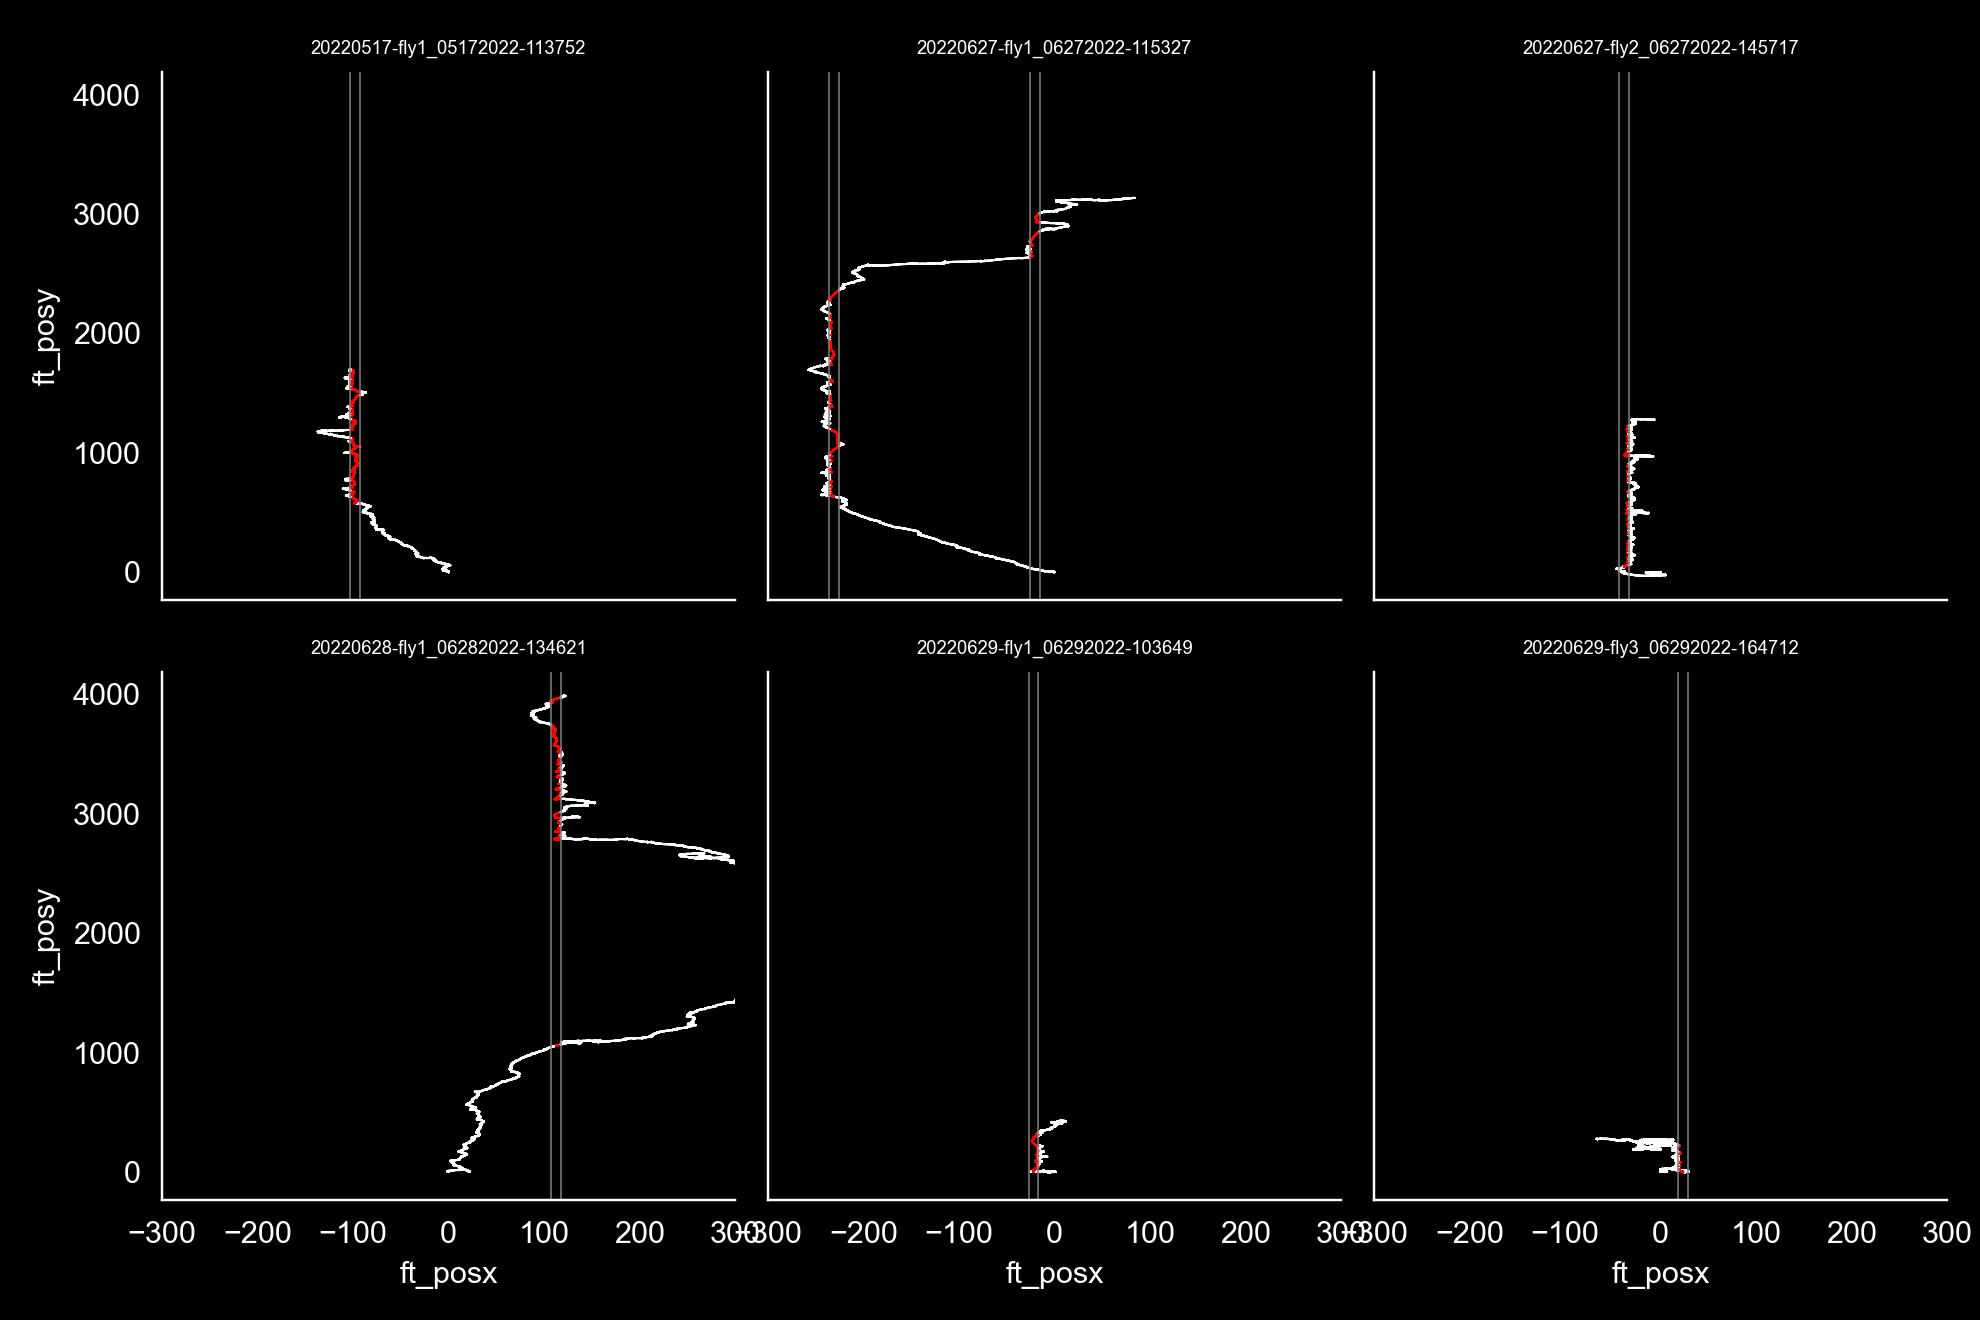

In [13]:
fig = butil.plot_all_flies(df0, col_wrap=3, strip_width=10)
figname = 'traj-all-flies'
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))

In [14]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [15]:
# get odor border for all fly
odor_borders = butil.get_odor_grid_all_flies(df0, strip_width=strip_width)
odor_borders

/Users/julianarhee/Repositories/plume-tracking/behavior.py:1179: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for trial_id, currdf in df0.groupby(['trial_id']):


{'20220517-fly1_05172022-113752': {'c4489': (-102.888950728061,
   -92.86972136147024)},
 '20220627-fly1_06272022-115327': {'c4449': (-235.88149581434,
   -225.5922358655783),
  'c22495': (-25.594510582436776, -15.506188370205798)},
 '20220627-fly2_06272022-145717': {'c4473': (-43.158324132461,
   -33.15173463407923)},
 '20220628-fly1_06282022-134621': {'c4495': (107.2808863438545,
   117.470350764182),
  'c10934': (307.258261980455, 317.30766467085)},
 '20220629-fly1_06292022-103649': {'c4435': (-27.0483922777703,
   -17.038242803346122)},
 '20220629-fly3_06292022-164712': {'c4474': (18.5854383369187,
   28.5854383369187)}}

## make all traj border the same way

In [16]:
odor_borders_fp=dict((k, dict()) for k in odor_borders.keys())
d_list=[]
for trial_id, df_ in df0.groupby('trial_id'):
    df_copy, new_borders = butil.check_entryside_and_flip(df_, strip_width=strip_width,
                                                      odor_dict=odor_borders[trial_id])
    d_list.append(df_copy)
    odor_borders_fp[trial_id] = new_borders
df_fp = pd.concat(d_list)

In [17]:
odor_borders_fp

{'20220517-fly1_05172022-113752': {'c4489': (97.888950728061,
   87.888950728061)},
 '20220627-fly1_06272022-115327': {'c4449': (230.88149581434, 220.88149581434),
  'c22495': (25.5061883702058, 15.506188370205798)},
 '20220627-fly2_06272022-145717': {'c4473': (-48.158324132461,
   -38.158324132461)},
 '20220628-fly1_06282022-134621': {'c4495': (107.470350764182,
   117.470350764182),
  'c10934': (307.30766467085, 317.30766467085)},
 '20220629-fly1_06292022-103649': {'c4435': (-32.048392277770304,
   -22.0483922777703)},
 '20220629-fly3_06292022-164712': {'c4474': (-23.5854383369187,
   -33.5854383369187)}}

<IPython.core.display.Javascript object>


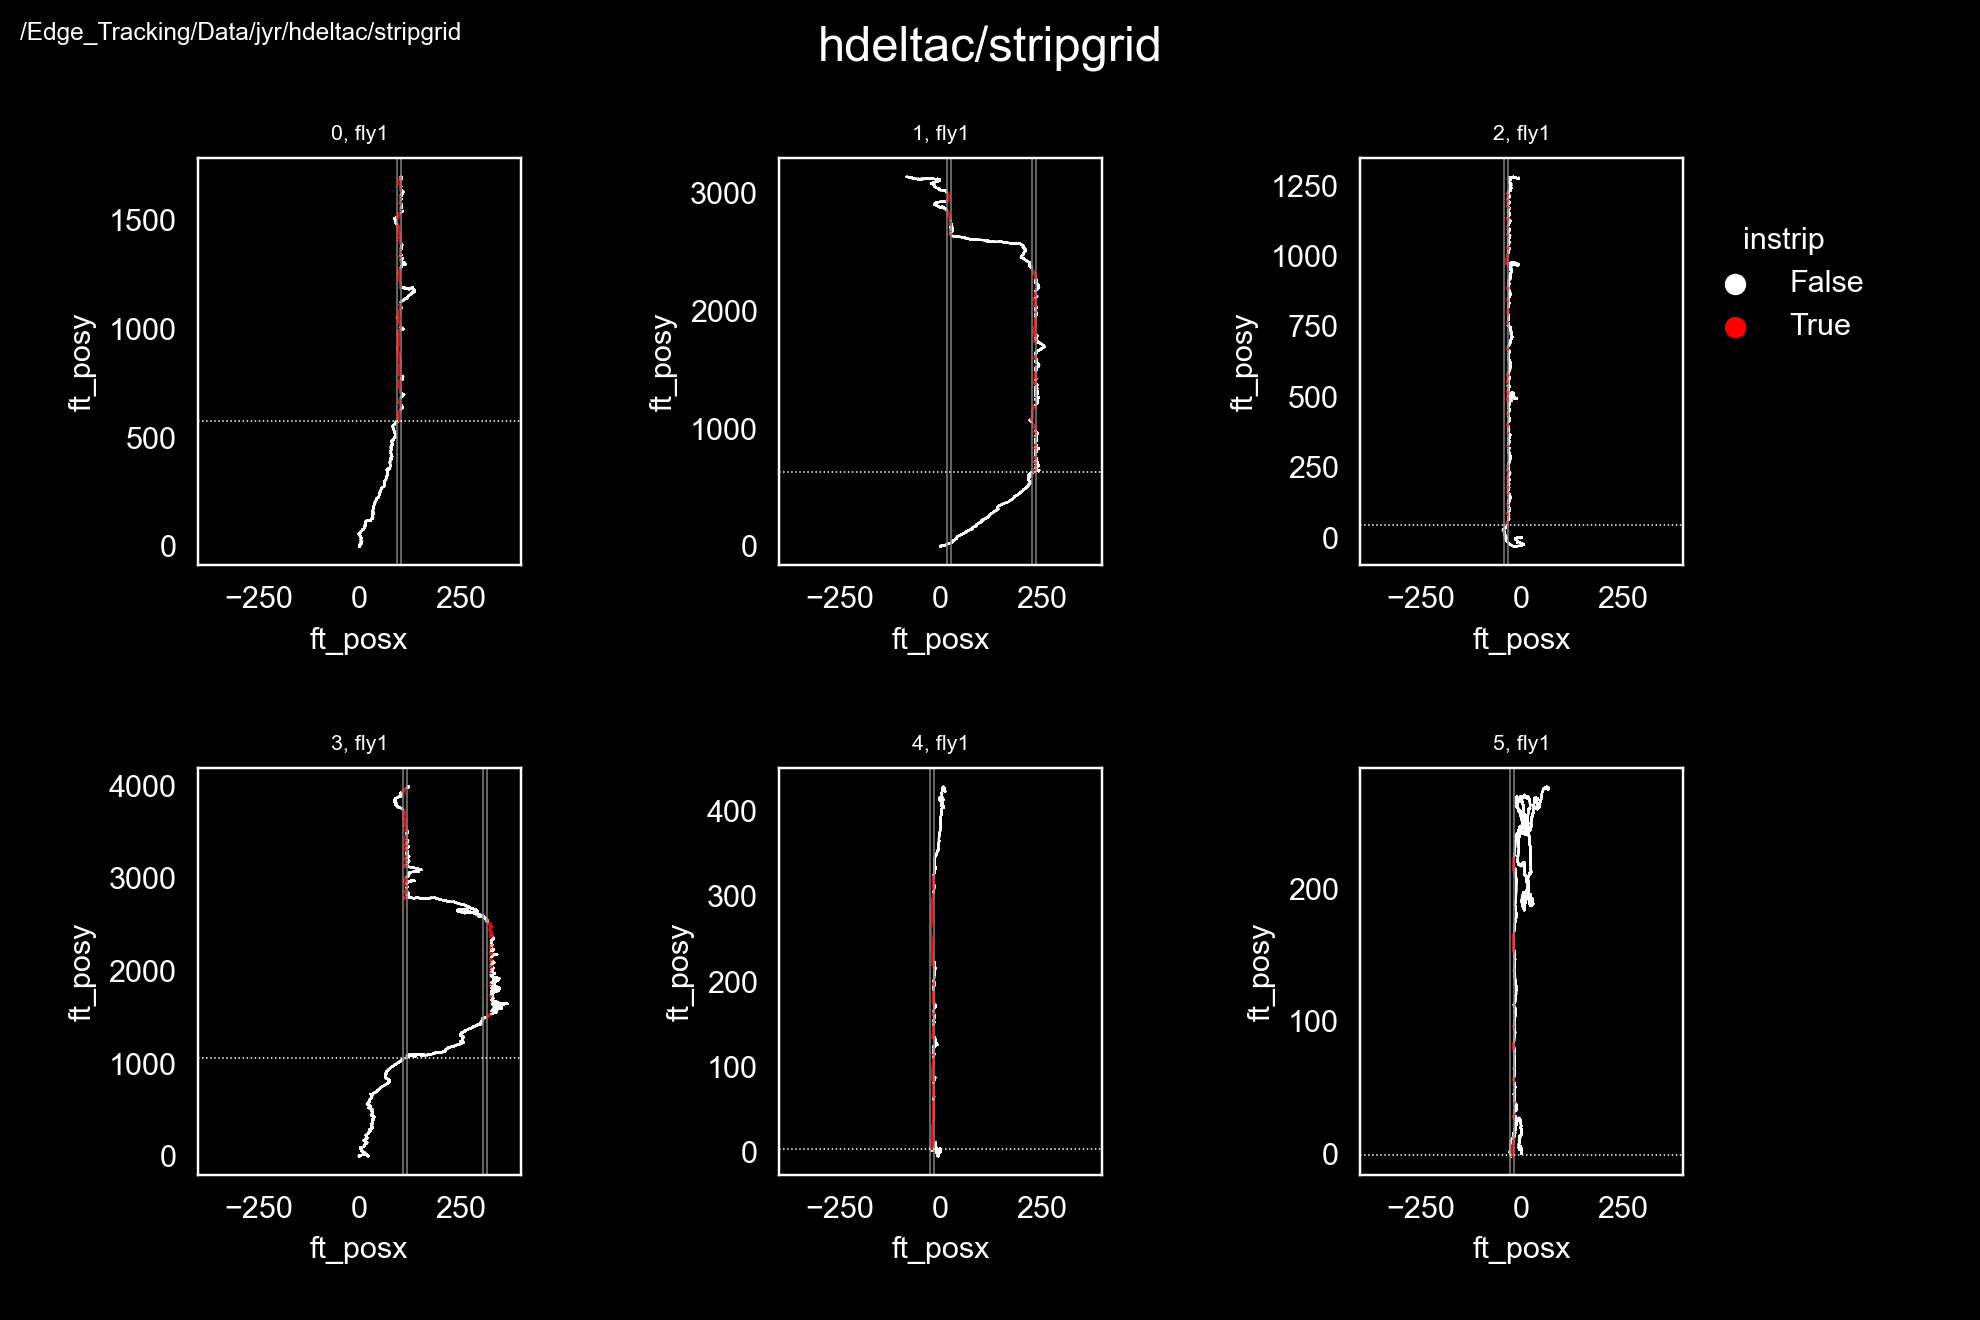

In [18]:
hue_varname='instrip'
palette='cool'
start_at_odor = False
odor_lc='lightgray'
odor_lw=0.5
nrows = 2
ncols = 3
palette={True: 'r', False: 'w'}

xmin, xmax = (-500, 500)
ymin, ymax = (-100, 1000)
odor_xmin, odor_xmax = (-100, 100)
fig, axes = pl.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(ncols*3, nrows*3))
ai = 0
#for fi, fpath in enumerate(log_files):
for fi, (trial_id, df_) in enumerate(df_fp.groupby('trial_id')):
    odor_params = butil.get_odor_params(df_, strip_width=strip_width, is_grid=True)
    plotdf = df_[df_['time']>=odor_params['odor_start_time']] if start_at_odor else df_
    # set subplot
    ax = axes.flat[ai]
    butil.plot_trajectory(plotdf, ax=ax,hue_varname=hue_varname, palette=palette,
                         odor_bounds=odor_params['odor_boundary'], plot_legend=True)
    if ai==ncols-1:
        ax.legend(bbox_to_anchor=(0.98, 0.9), ncol=1,
                  loc='upper left', title=hue_varname, frameon=False) 
    else:
        ax.legend_.remove()  
    title = '{}, {}'.format(fi, fly_id)
    ax.set_title(title, fontsize=7)
    ax.set_xlim([-400, 400])
    ai+=1
# remove unused axes
for ix in np.arange(fi+1, nrows*ncols):
    axes.flat[ix].axis('off')
# adjust plots
pl.subplots_adjust(hspace=0.5, wspace=0.8, left=0.1, right=0.85)
fig.suptitle(experiment, fontsize=16)
util.label_figure(fig, fig_id)
figname = 'traj-flipped_all_flies'
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))

In [19]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

# 1 fly

In [20]:
#df = df_fp.copy()
print(df_fp['fly_id'].unique())
print(fly_id)

['20220517-fly1' '20220627-fly1' '20220627-fly2' '20220628-fly1'
 '20220629-fly1' '20220629-fly3']
fly1


In [21]:
fly_id = '20220517-fly1'#'20220629-fly3' #'20220530-fly0'
# select save dir
curr_savedir = os.path.join(os.path.split(savedir)[0], fly_id)
if not os.path.exists(curr_savedir):
    os.makedirs(curr_savedir)
print(curr_savedir)
# ---------
# df_ = df_fp[(df_fp['fly_id']==fly_id) ].copy()
df_ = df_fp[(df_fp['fly_id']==fly_id) ].copy()

trial_id = df_['trial_id'].unique()[0]
print(trial_id)
odor_dict = odor_borders_fp[trial_id]
oparams = butil.get_odor_params(df_, strip_width=strip_width, is_grid=True)

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1
20220517-fly1_05172022-113752


##### double-check entries

In [22]:
corridor_starts =  [int(k[1:]) for k, v in odor_dict.items()]
i=0
entry_ix = corridor_starts[i]
last_outbout_ix = df_.loc[entry_ix-1].name
print(entry_ix)
start_ = 0 if i==0 else last_outbout_ix
stop_ = corridor_starts[i+1]-1 if len(corridor_starts)>1 else df_.iloc[-1].name
print(start_, stop_)
tmpdf = df_.loc[start_:stop_-1].copy()
entry_left_edge, entry_lefts = butil.check_entry_left_edge(tmpdf, 
                                            entry_ix=entry_ix, return_bool=True)

4489
0 12516


In [23]:
# TODO:  butil.get_odor_params() is correct, but odor_borders full dict is not? 

<IPython.core.display.Javascript object>


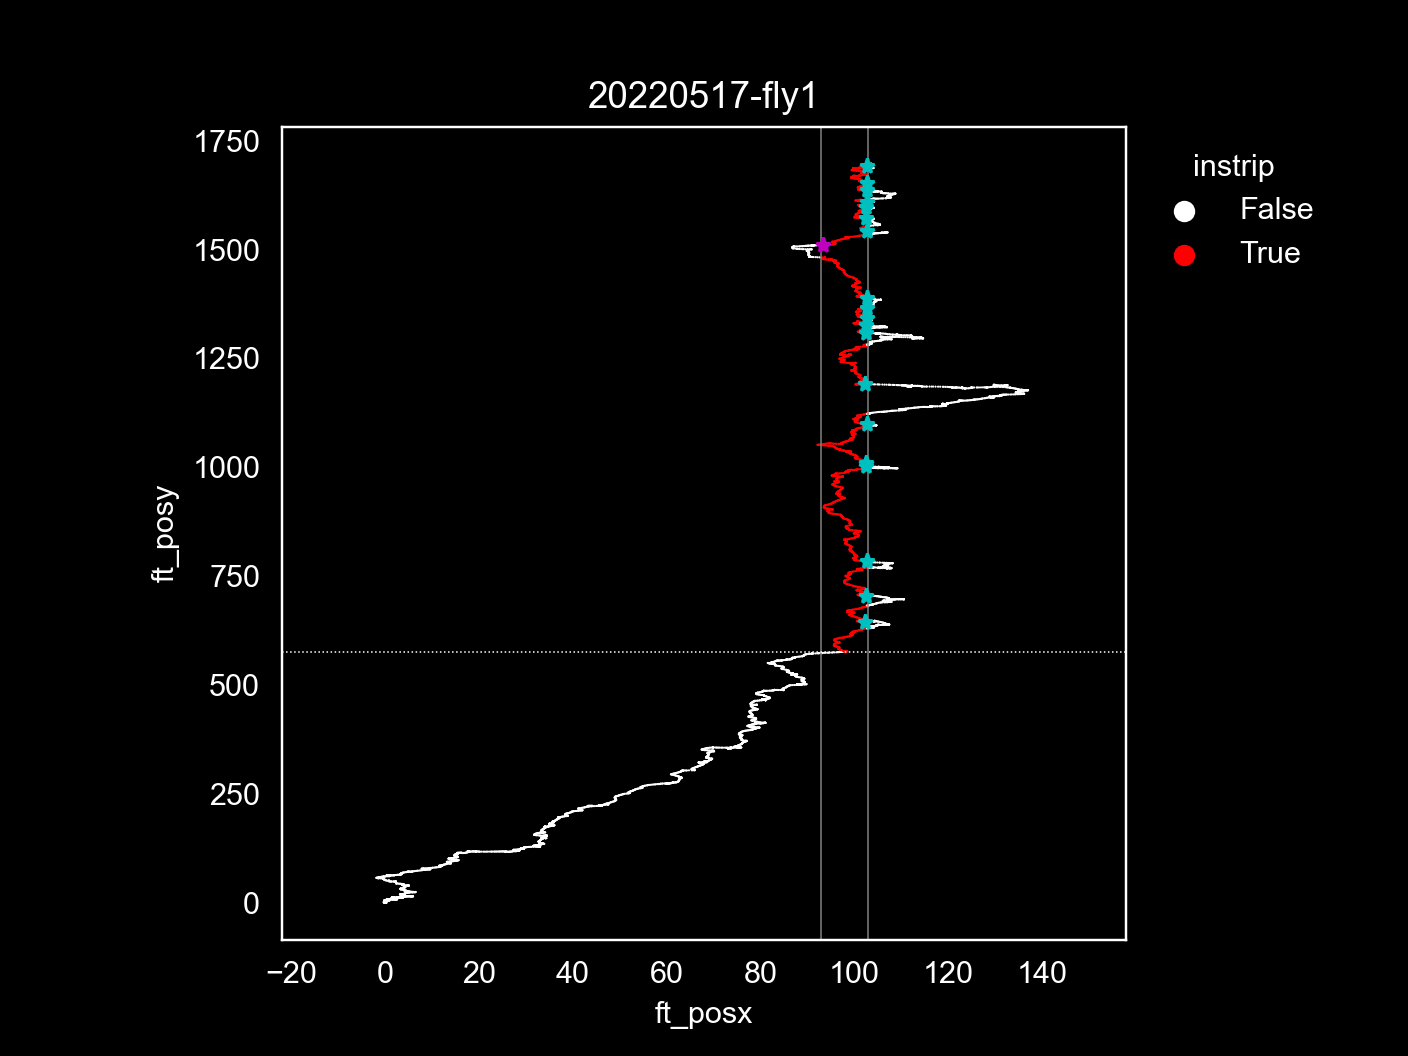

In [24]:
fig, ax = pl.subplots()
ax=butil.plot_trajectory(tmpdf, ax=ax,odor_bounds=oparams['odor_boundary'])
ax.set_title(fly_id)
for i, (ix, val) in entry_lefts[['entry_index', 'entry_left_edge']].iterrows():
    c='m' if val is True else 'c'
    ax.plot(tmpdf.loc[ix]['ft_posx'], 
            tmpdf.loc[ix]['ft_posy'], c=c, marker='*', markersize=5)

# rdp

In [28]:
# df_ = df_fp[df_fp['fly_id']=='20220517-fly1'].copy()

In [29]:
smooth = False
xvar='smoothed_ft_posx' if smooth else 'ft_posx'
yvar='smoothed_ft_posy' if smooth else 'ft_posy'
smooth_window=11
rdp_epsilon=1 #0.5 # distance unit (usually, 1mm)
# for varname in ['ft_posx', 'ft_posy']:
#     df = butil.smooth_traces(df, varname=varname, window_size=smooth_window)
# df = butil.smooth_path(df, s=10)
df_ = butil.smooth_traces(df_, window_size=smooth_window, return_same=True)
df_ = butil.add_rdp_by_bout(df_, epsilon=rdp_epsilon, xvar=xvar, yvar=yvar)
df_.columns

Index(['timestamp -- motor_step_command', 'mfc1_stpt', 'mfc2_stpt',
       'mfc3_stpt', 'led1_stpt', 'led2_stpt', 'sig_status', 'ft_posx',
       'ft_posy', 'ft_frame', 'ft_error', 'ft_roll', 'ft_pitch', 'ft_yaw',
       'ft_heading', 'instrip', 'filename', 'fpath', 'timestamp',
       'motor_step_command', 'time', 'rel_time', 'date', 'odor_on',
       'strip_type', 'led_on', 'experiment', 'fly_name', 'condition', 'trial',
       'fly_id', 'trial_id', 'genotype', 'boutnum', 'cum_time', 'speed',
       'upwind_speed', 'crosswind_speed', 'euclid_dist', 'upwind_dist',
       'crosswind_dist', 'bout_type', 'smoothed_ft_posx', 'smoothed_ft_posy',
       'flipped', 'ft_heading_og', 'rdp_ft_posx', 'rdp_ft_posy'],
      dtype='object')

In [30]:
rdp_var='rdp_{}'.format(xvar)
rdp_dists = butil.get_rdp_distances(df_, rdp_var=rdp_var)
sorted_by_dist = rdp_dists.sort_values(by='crosswind_dist')['boutnum'].unique()
# Get long-ish outbouts
rdp_dist_thresh = 3
incl_bouts = rdp_dists[rdp_dists['crosswind_dist']>rdp_dist_thresh]['boutnum']
print('{} of {} bouts >{} mm'.format(len(incl_bouts), \
                                     len(rdp_dists['boutnum'].unique()), rdp_dist_thresh))
boutdf = df_[df_['boutnum'].isin(incl_bouts)].copy()
#outbouts = boutdf[~boutdf['instrip']]['boutnum'].unique()
bouts_to_plot = sorted_by_dist #[b for b in sorted_by_dist if b in outbouts]
# len(bouts_to_plot)
long_dists = rdp_dists[rdp_dists['crosswind_dist']>10]['boutnum']
plot_bouts = [b for b in long_dists if b in bouts_to_plot]
len(plot_bouts)

33 of 43 bouts >3 mm


19

<IPython.core.display.Javascript object>


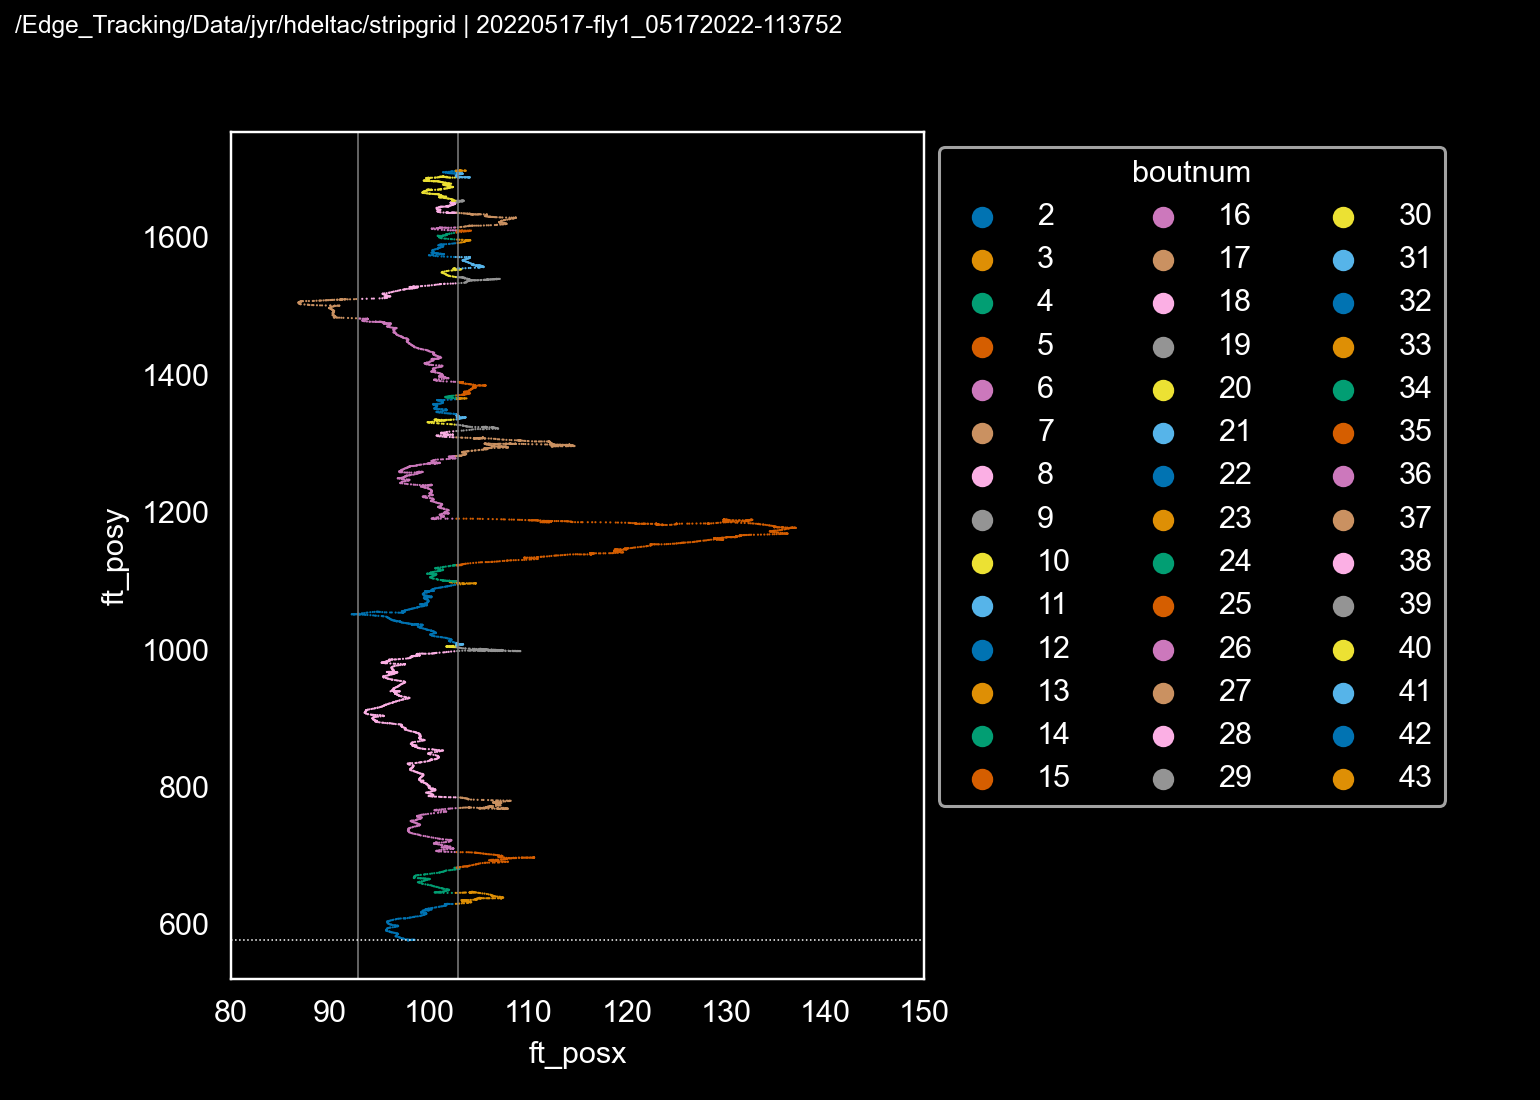

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 traj-bouts_20220517-fly1


In [31]:
fig, ax = pl.subplots(figsize=(7,5))
butil.plot_trajectory(df_[df_['time']>=oparams['odor_start_time']], 
                     odor_bounds=oparams['odor_boundary'],
                     hue_varname='boutnum', palette='colorblind', ax=ax)
ax.set_xlim([80, 150])
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncols=3, title='boutnum')
pl.subplots_adjust(left=0.15, right=0.6)

util.label_figure(fig, '{} | {}'.format(fig_id, trial_id))
figname = 'traj-bouts_{}'.format(fly_id)
pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)))
print(curr_savedir, figname)

##### look at bouts > 10mm crosswind

<IPython.core.display.Javascript object>


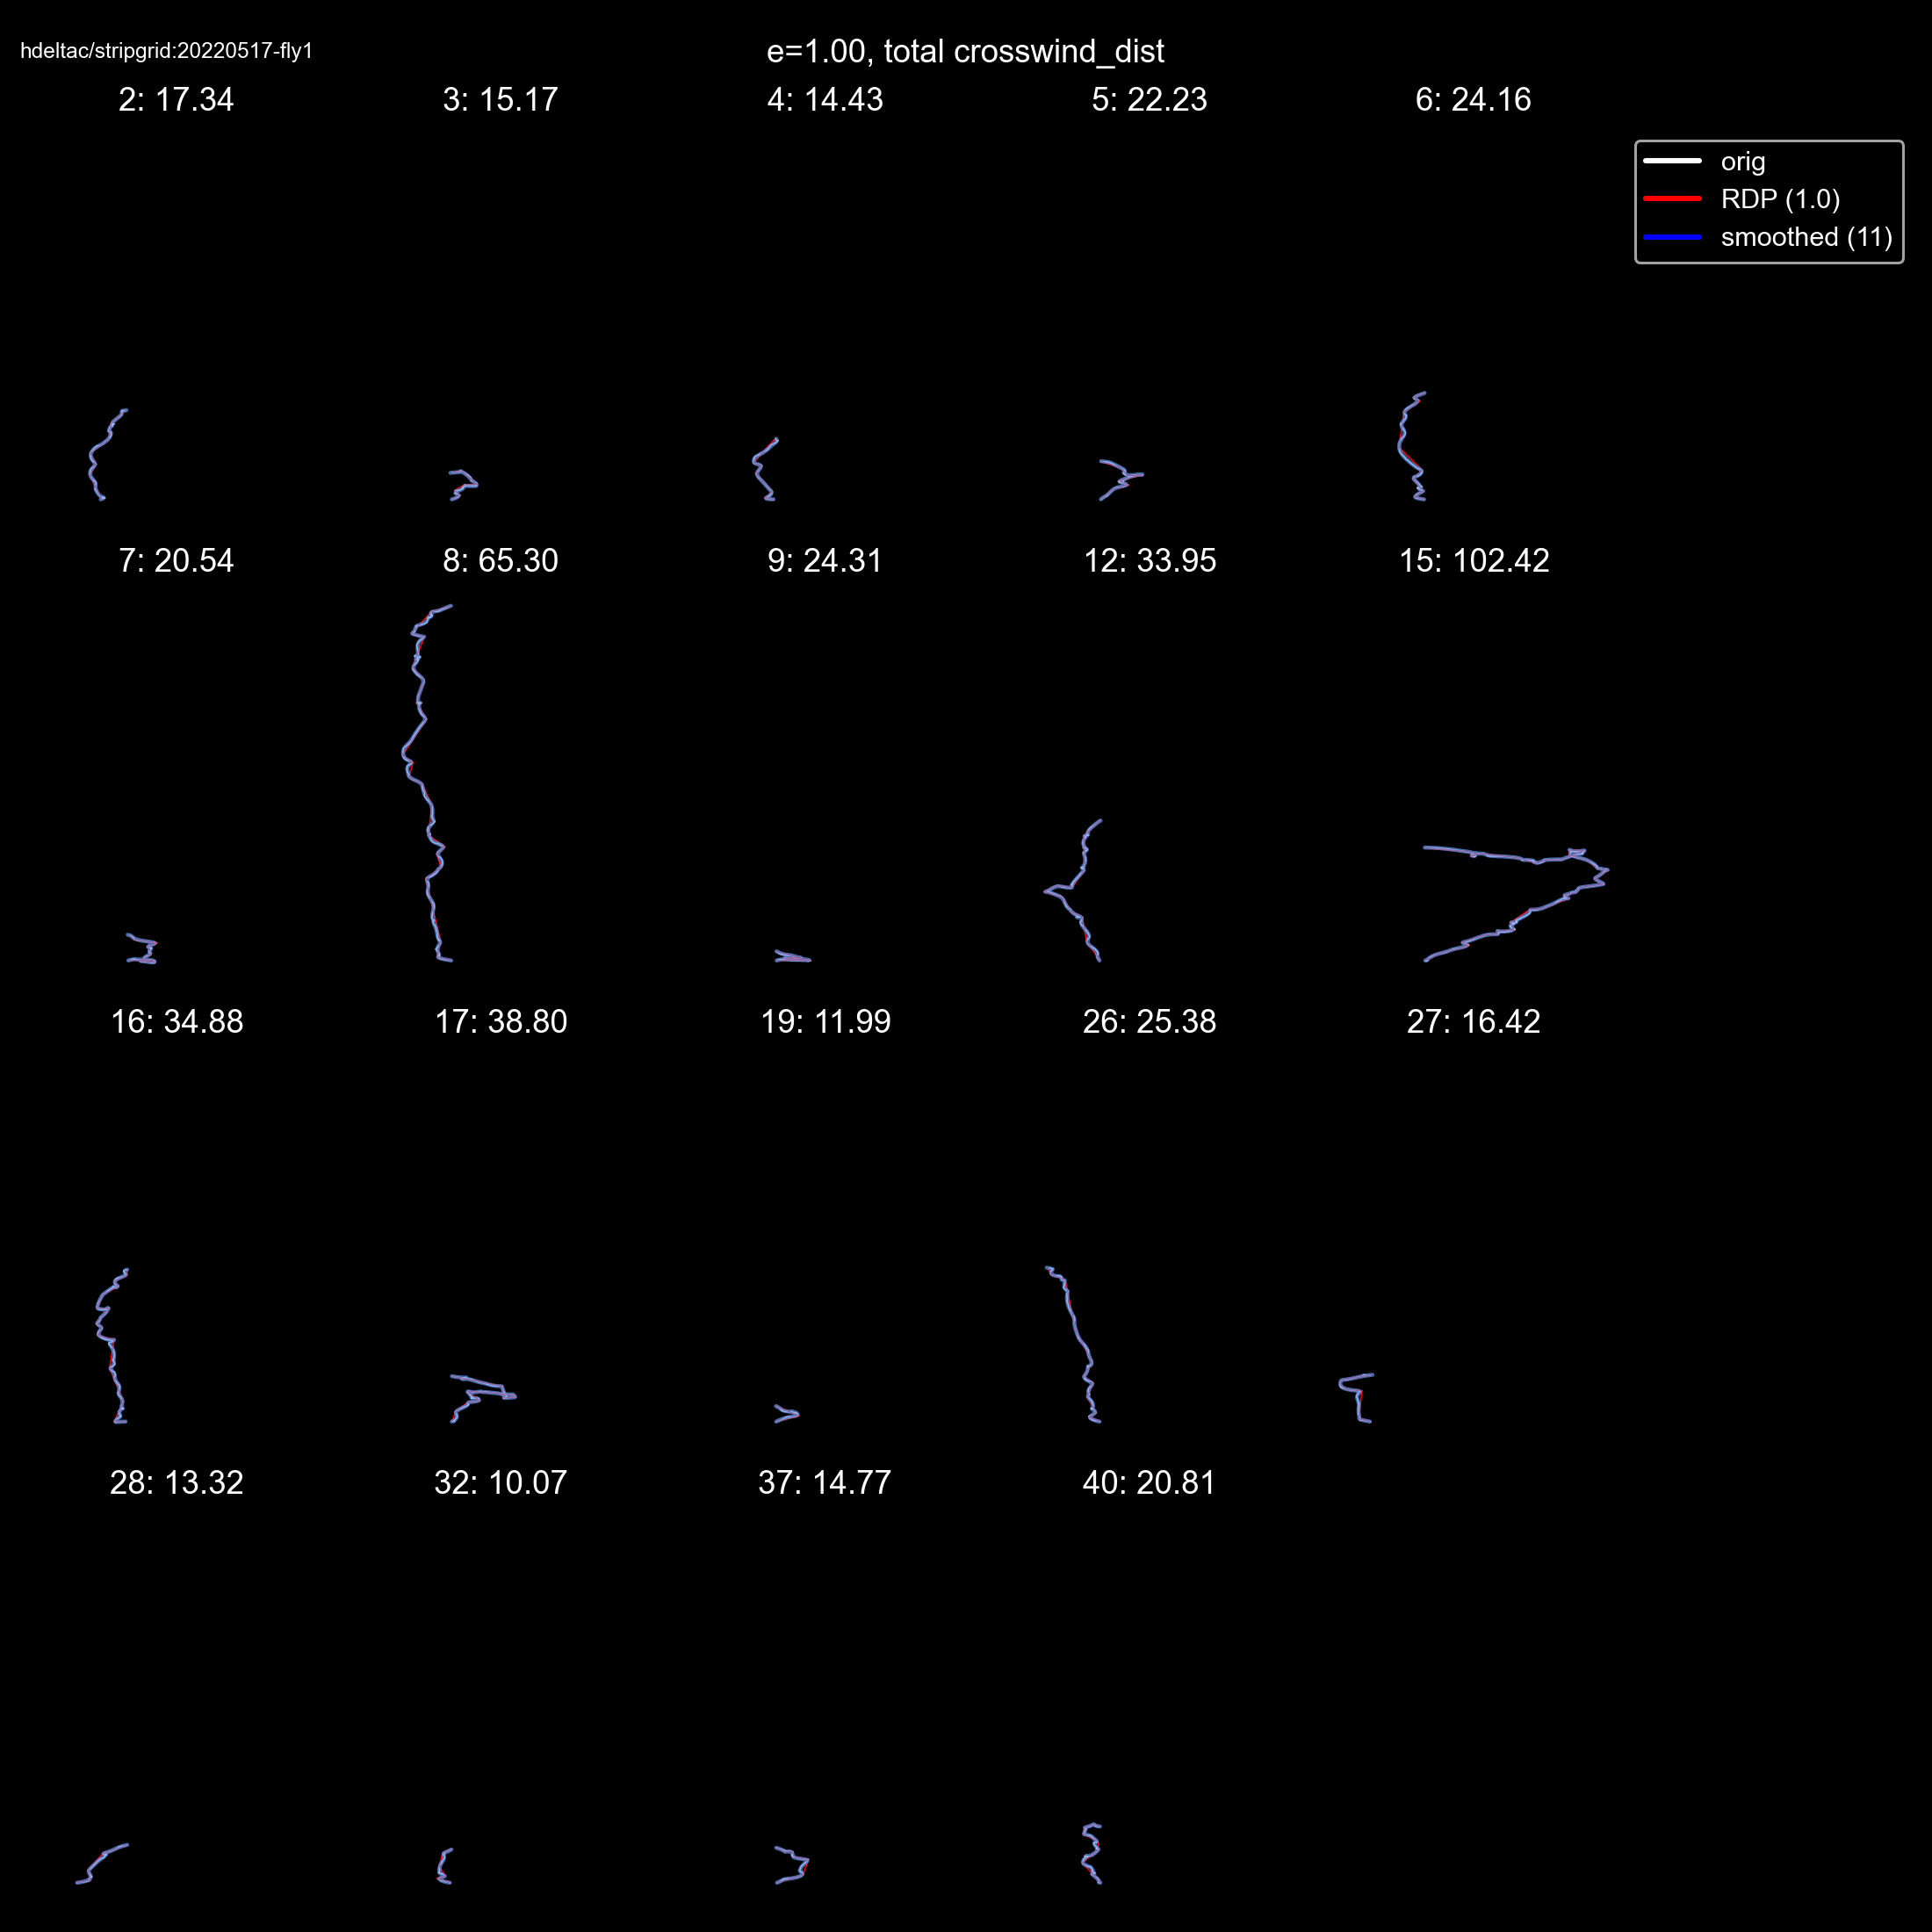

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 rdp-bouts_20220517-fly1


In [32]:
distvar='crosswind_dist'
nr=4
nc=5
plotdf = boutdf[boutdf['boutnum'].isin(plot_bouts)]
fig = butil.plot_overlay_rdp_v_smoothed_multi(plotdf, boutlist=None, nr=nr, nc=nc,
                                  distvar=distvar, xvar=xvar, yvar=yvar, sharex=True, sharey=True)
fig.suptitle('e={:.2f}, total {}'.format(rdp_epsilon, distvar))
util.label_figure(fig, '{}:{}'.format(experiment, fly_id))
pl.tight_layout()

figname = 'rdp-bouts_{}'.format(fly_id)
pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)))
print(curr_savedir, figname)

## test heading

In [33]:
import scipy.stats as sts

In [34]:
# curr_savedir = os.path.join(os.path.split(save_dir)[0], 'flipped')
if not os.path.exists(curr_savedir):
    os.makedirs(curr_savedir)
print(curr_savedir)

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1


In [35]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [36]:
df_fp['fly_id'].unique()

array(['20220517-fly1', '20220627-fly1', '20220627-fly2', '20220628-fly1',
       '20220629-fly1', '20220629-fly3'], dtype=object)

In [37]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [45]:
#fly_id = '20220627-fly2'
fly_id = '20220517-fly1'

#df_ = df0[(df0['fly_id']==fly_id) ].copy()
df_ = df_fp[(df_fp['fly_id']==fly_id) ].copy()

#df_ = butil.process_df(df_)
df_ = butil.smooth_traces(df_, window_size=smooth_window, return_same=True)
df_ = butil.add_rdp_by_bout(df_, epsilon=rdp_epsilon, xvar=xvar, yvar=yvar)
df_['ft_heading_deg'] = np.rad2deg(df_['ft_heading'])
df_.columns

Index(['timestamp -- motor_step_command', 'mfc1_stpt', 'mfc2_stpt',
       'mfc3_stpt', 'led1_stpt', 'led2_stpt', 'sig_status', 'ft_posx',
       'ft_posy', 'ft_frame', 'ft_error', 'ft_roll', 'ft_pitch', 'ft_yaw',
       'ft_heading', 'instrip', 'filename', 'fpath', 'timestamp',
       'motor_step_command', 'time', 'rel_time', 'date', 'odor_on',
       'strip_type', 'led_on', 'experiment', 'fly_name', 'condition', 'trial',
       'fly_id', 'trial_id', 'genotype', 'boutnum', 'cum_time', 'speed',
       'upwind_speed', 'crosswind_speed', 'euclid_dist', 'upwind_dist',
       'crosswind_dist', 'bout_type', 'smoothed_ft_posx', 'smoothed_ft_posy',
       'flipped', 'ft_heading_og', 'rdp_ft_posx', 'rdp_ft_posy',
       'ft_heading_deg'],
      dtype='object')

In [46]:
bnum = 15# 15#43 #11 #37 #45 #31 #17 #17
df_ = butil.get_speed_and_stops(df_, speed_thresh=1.0, stopdur_thresh=0.5)
b_ = df_[df_['boutnum']==bnum].copy()
theta_range = (-np.pi, np.pi) #(0, 2*np.pi)

Changing 1


In [47]:
theta_range

(-3.141592653589793, 3.141592653589793)

<IPython.core.display.Javascript object>


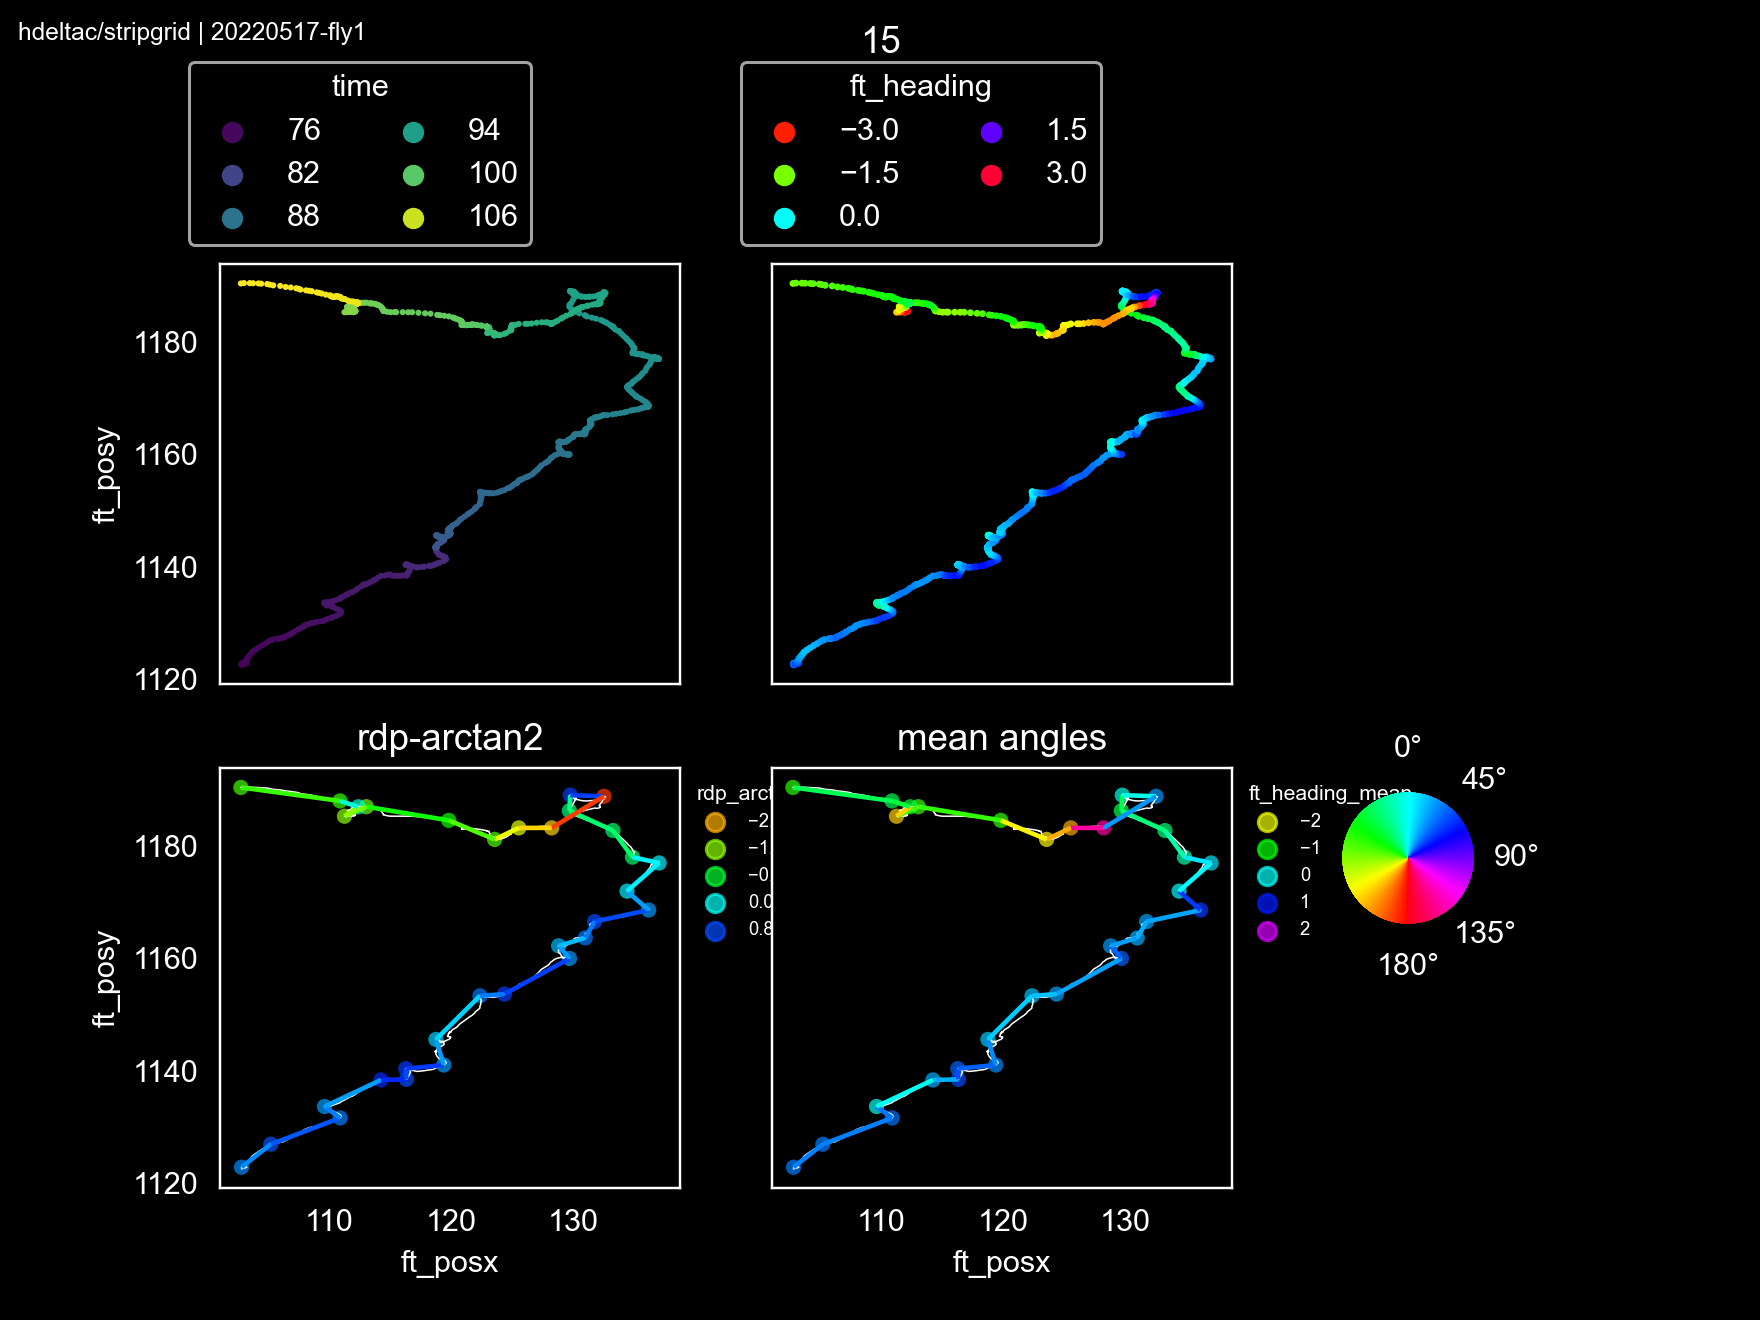

In [48]:
theta_range=(-np.pi, np.pi)
fig = butil.examine_heading_in_bout(b_, theta_range=theta_range, show_angles=True,
                                xvar=xvar, yvar=yvar, heading_var_og='ft_heading',
                                heading_var='ft_heading')
fig.suptitle(bnum)
pl.subplots_adjust(right=0.7, top=0.8, bottom=0.1)
util.label_figure(fig, '{} | {}'.format(experiment, fly_id))


In [49]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

<IPython.core.display.Javascript object>


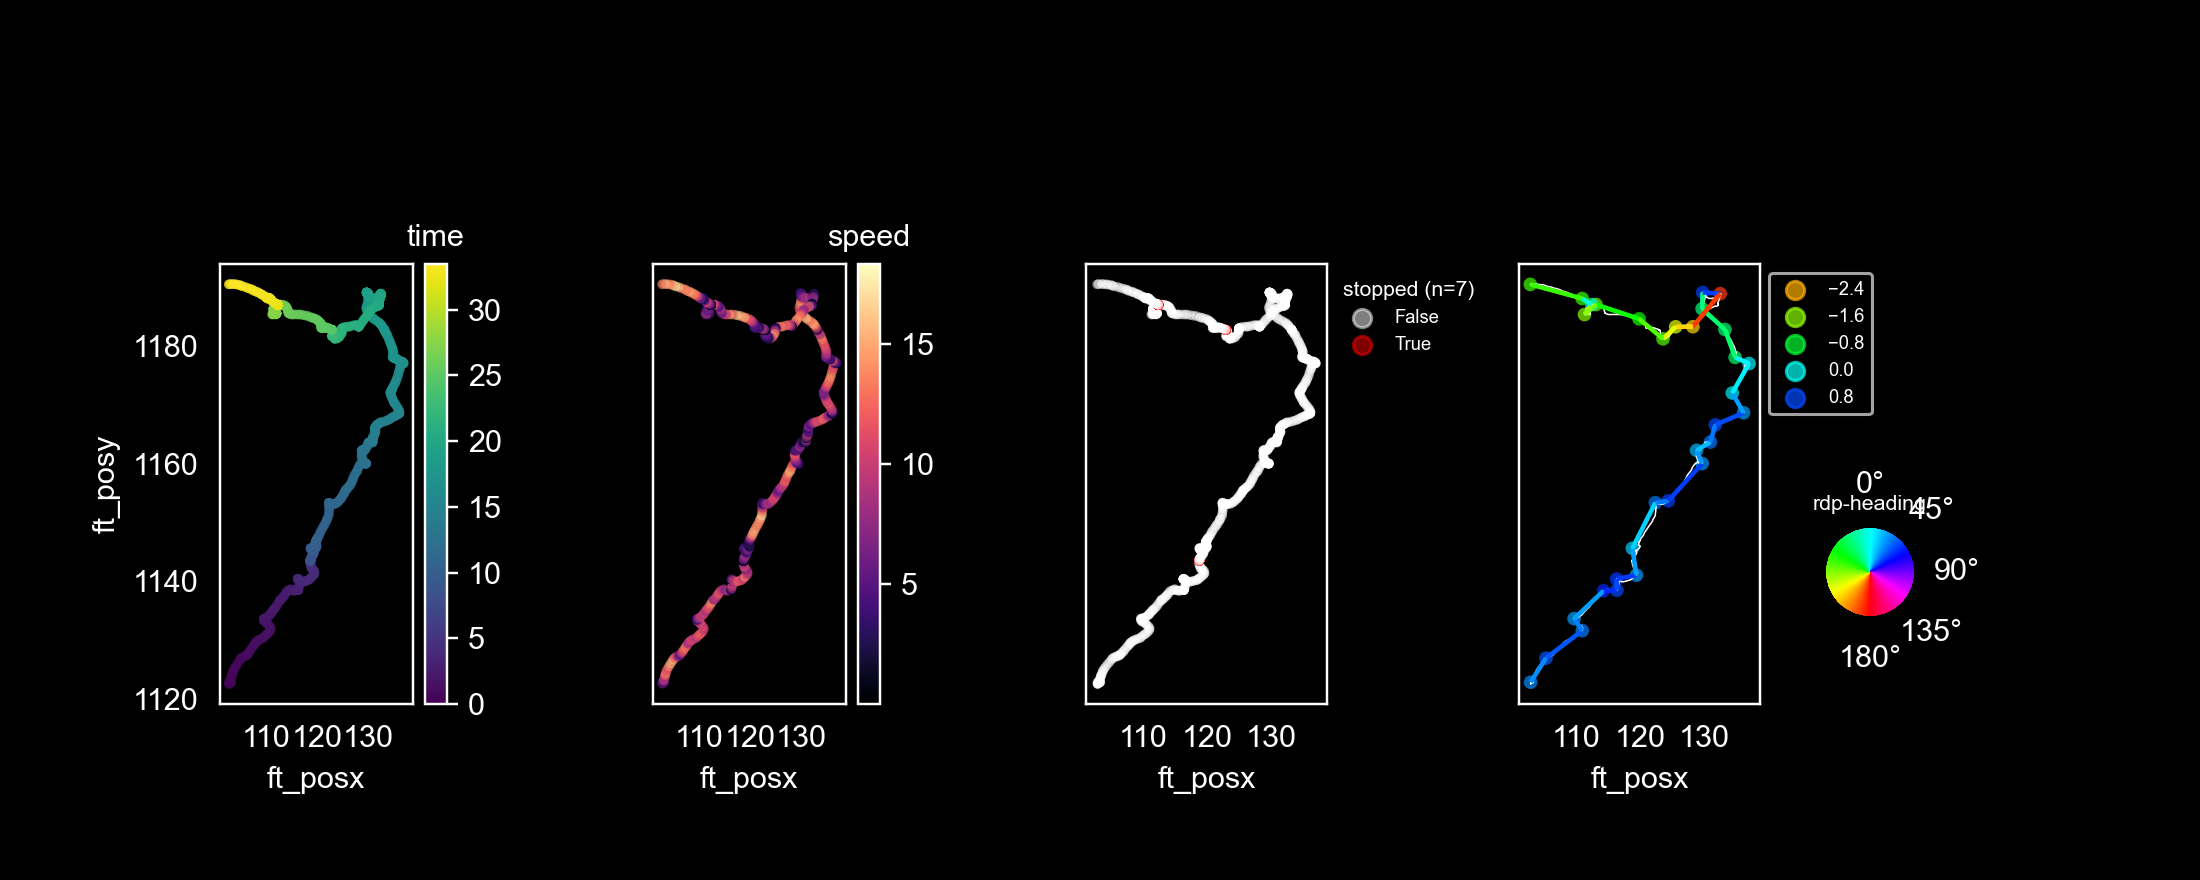

In [50]:
fig = butil.examine_heading_at_stops(b_, xvar=xvar, yvar=yvar, 
                                     theta_range=theta_range, show_angles=True)


Changing 1


<IPython.core.display.Javascript object>


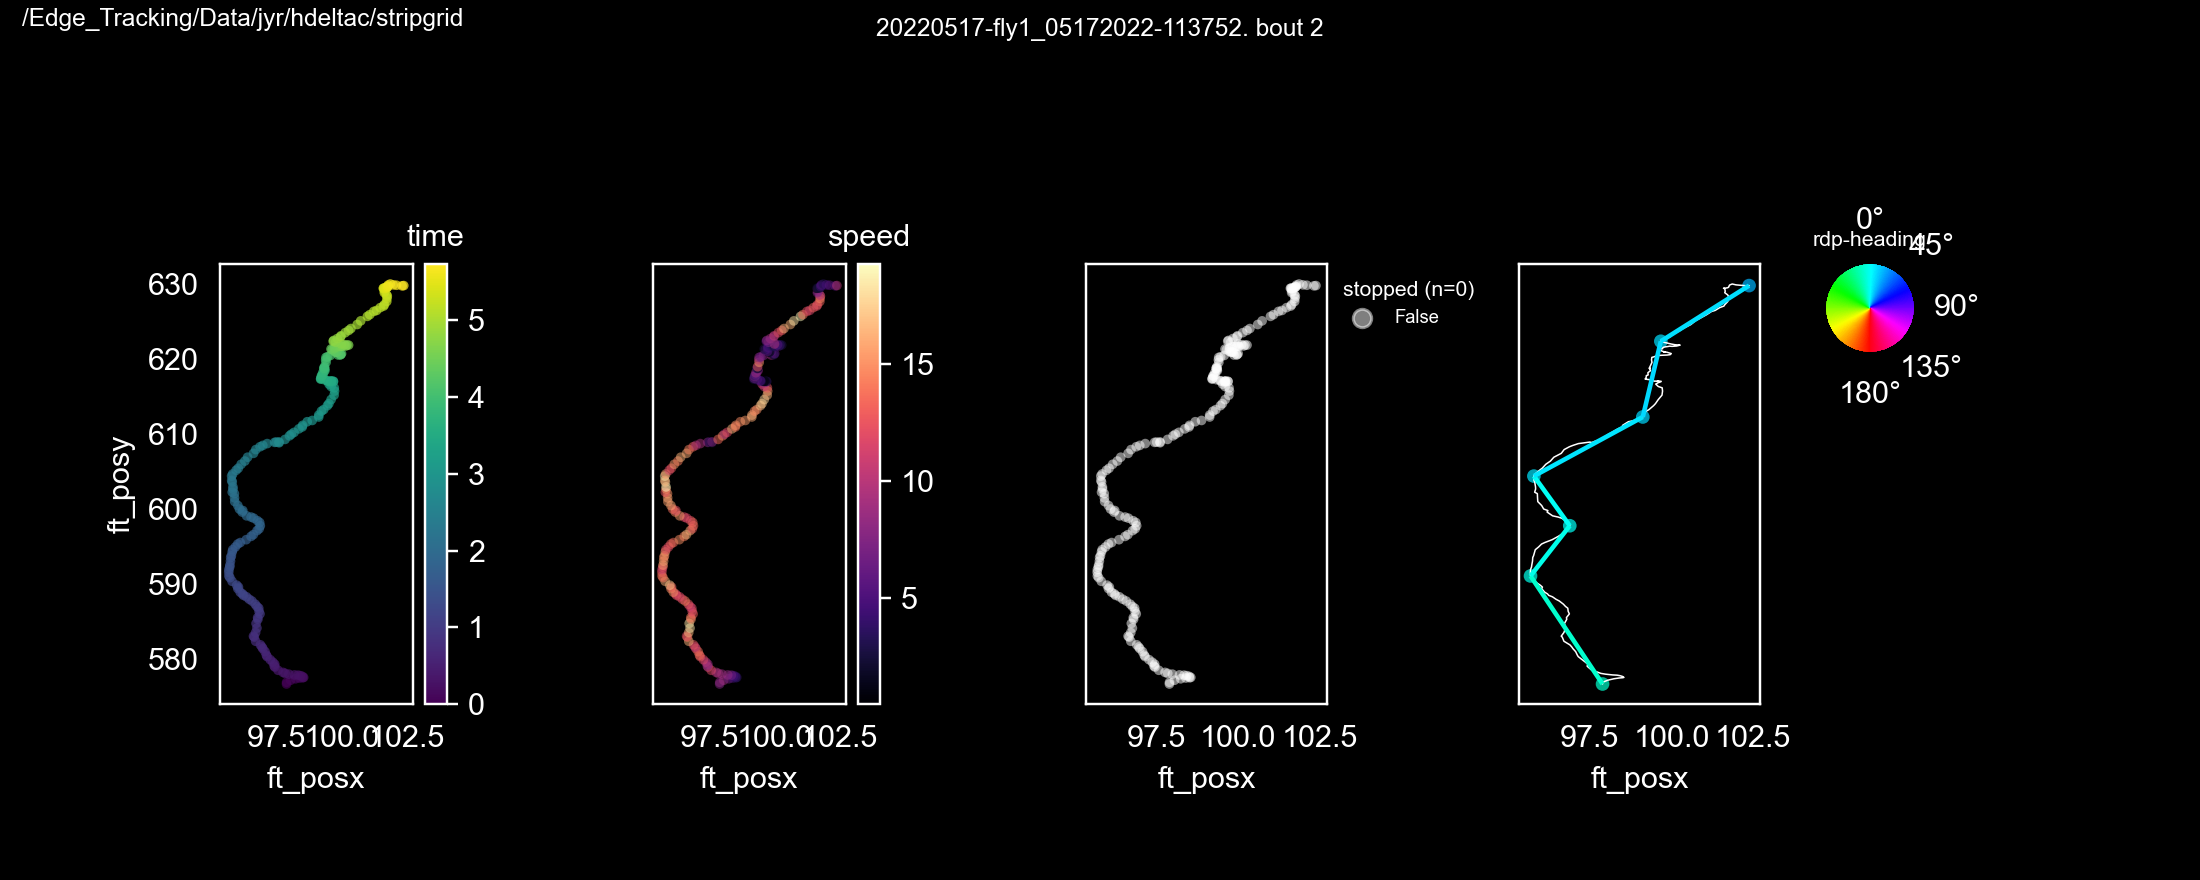

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 heading-at-stops_20220517-fly1_05172022-113752_bout2


<IPython.core.display.Javascript object>


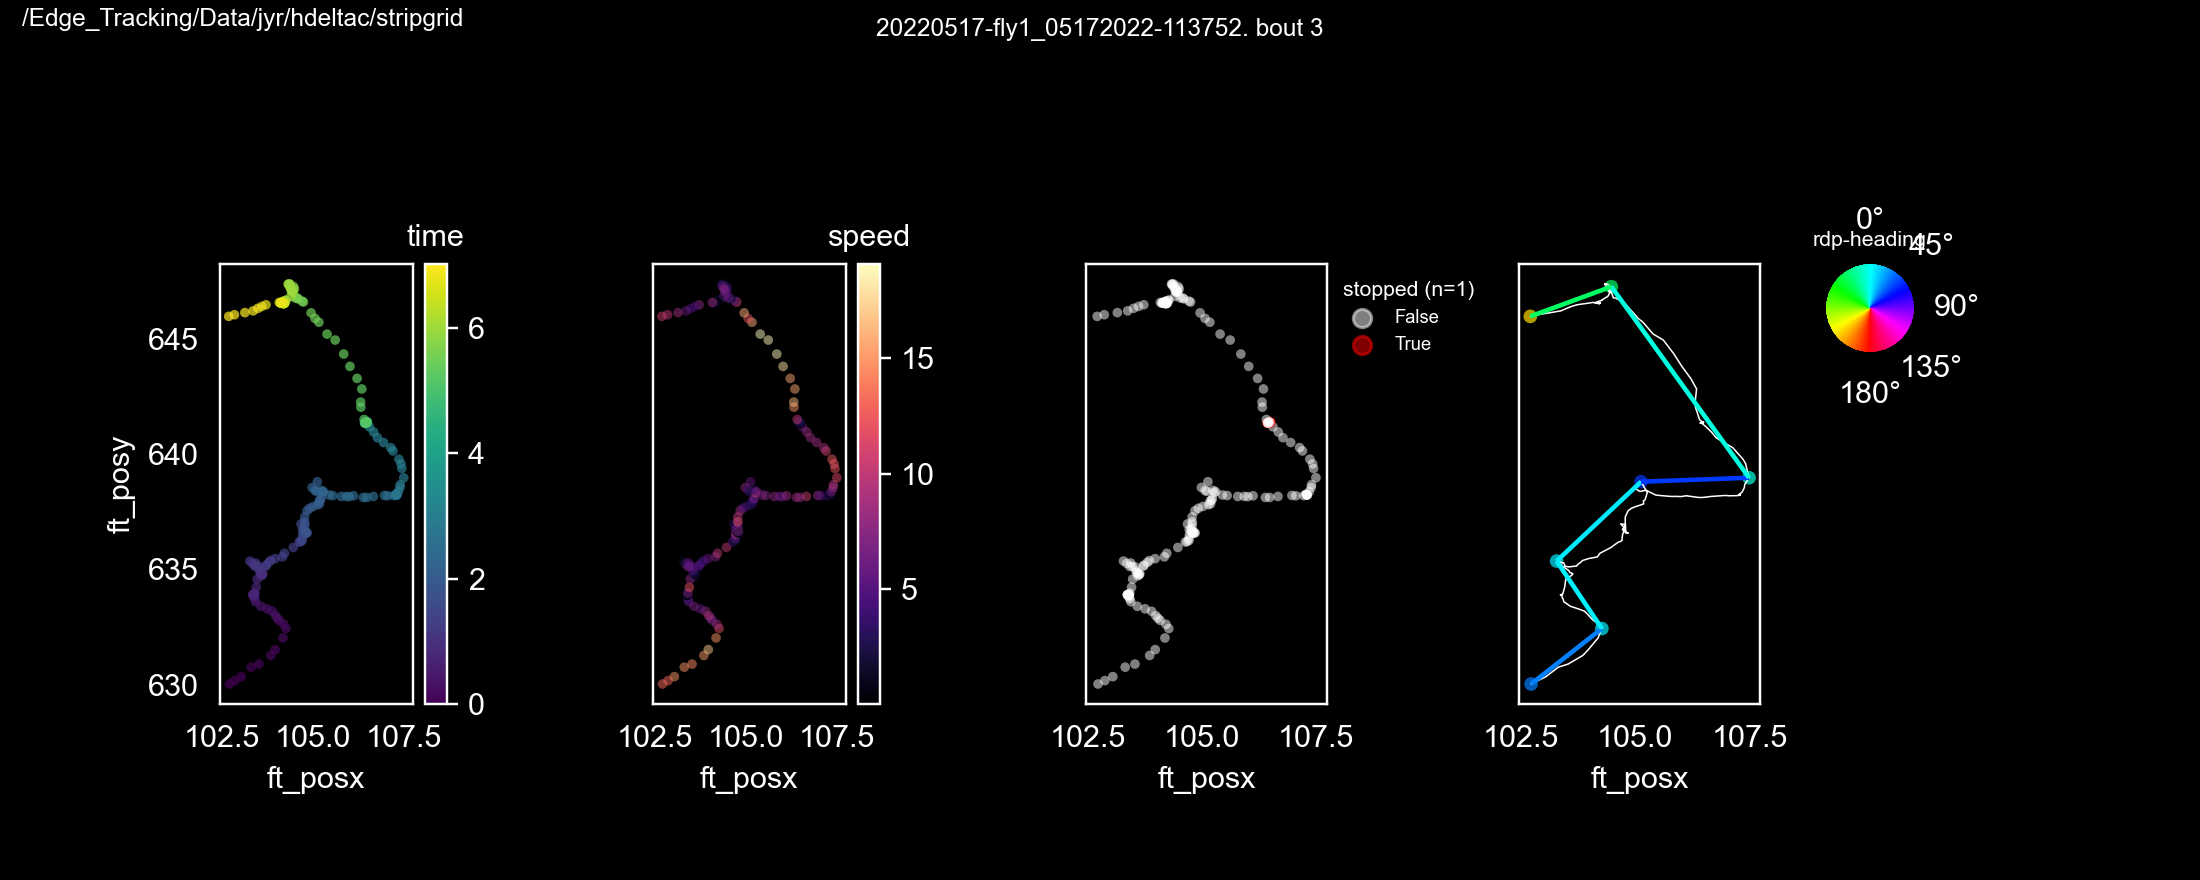

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 heading-at-stops_20220517-fly1_05172022-113752_bout3


<IPython.core.display.Javascript object>


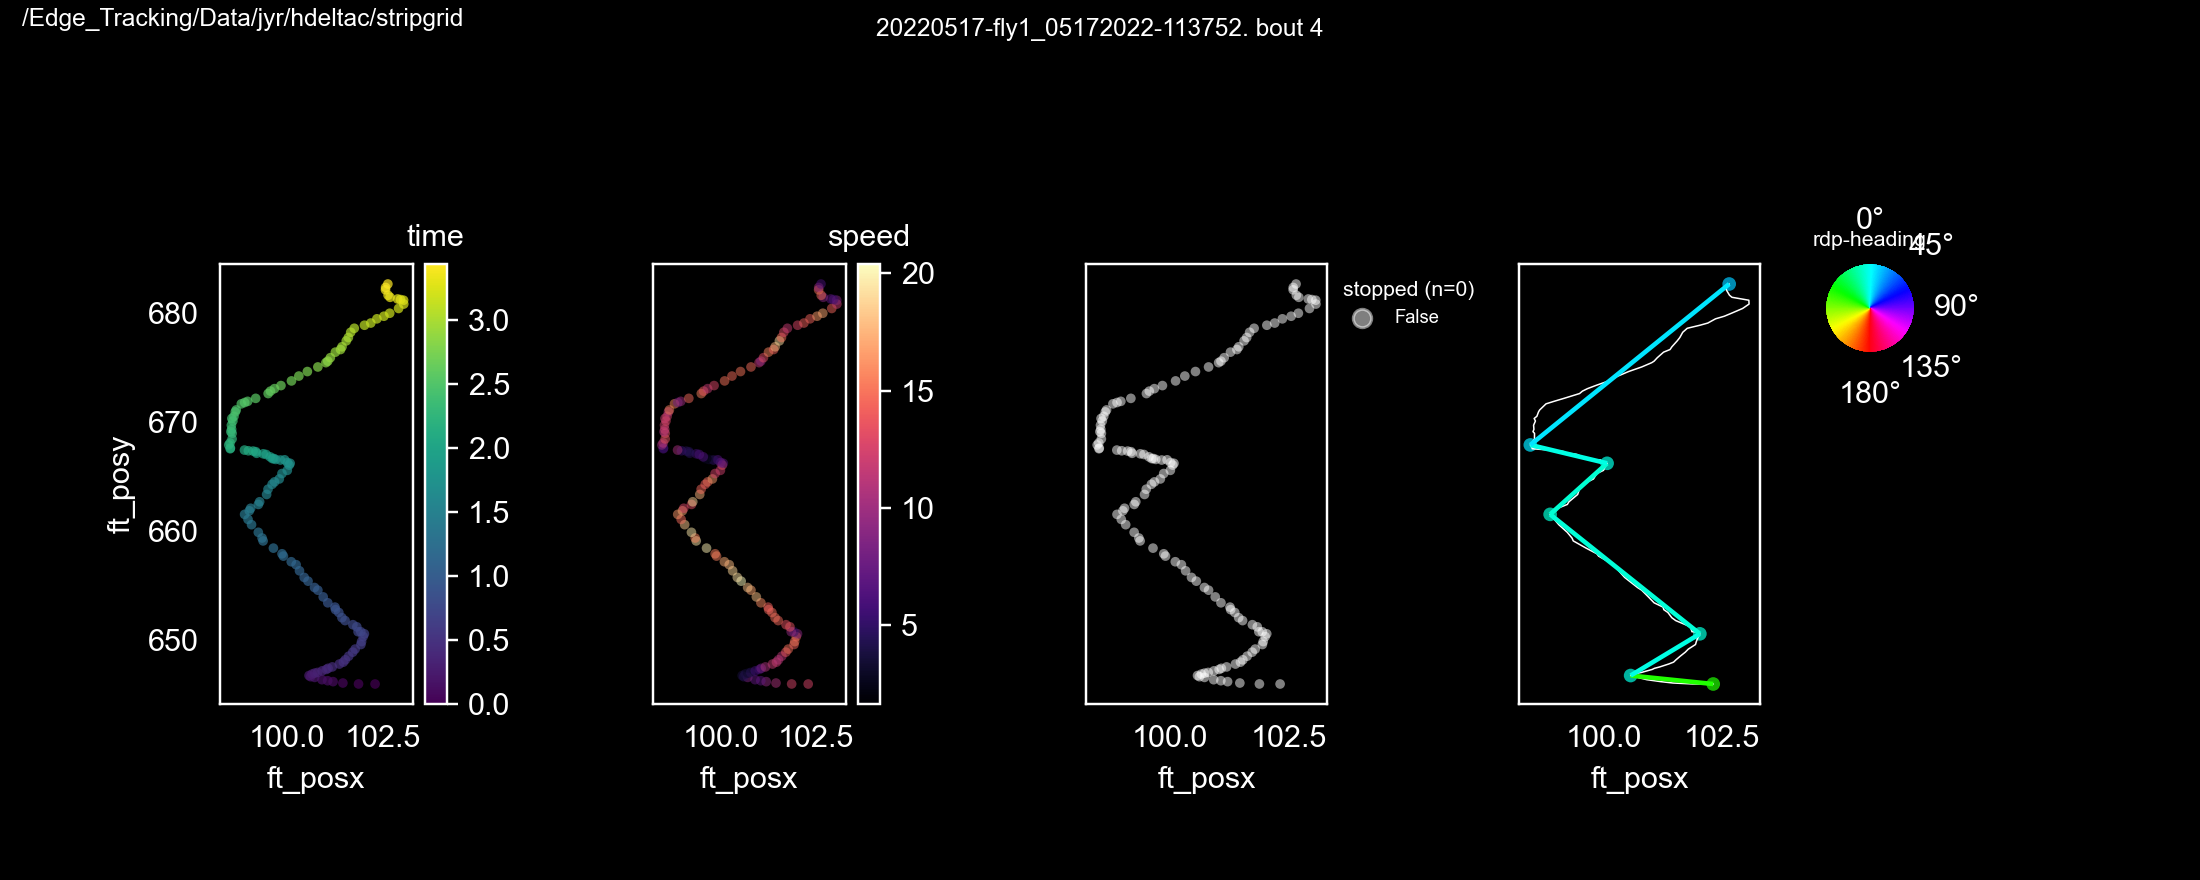

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 heading-at-stops_20220517-fly1_05172022-113752_bout4


<IPython.core.display.Javascript object>


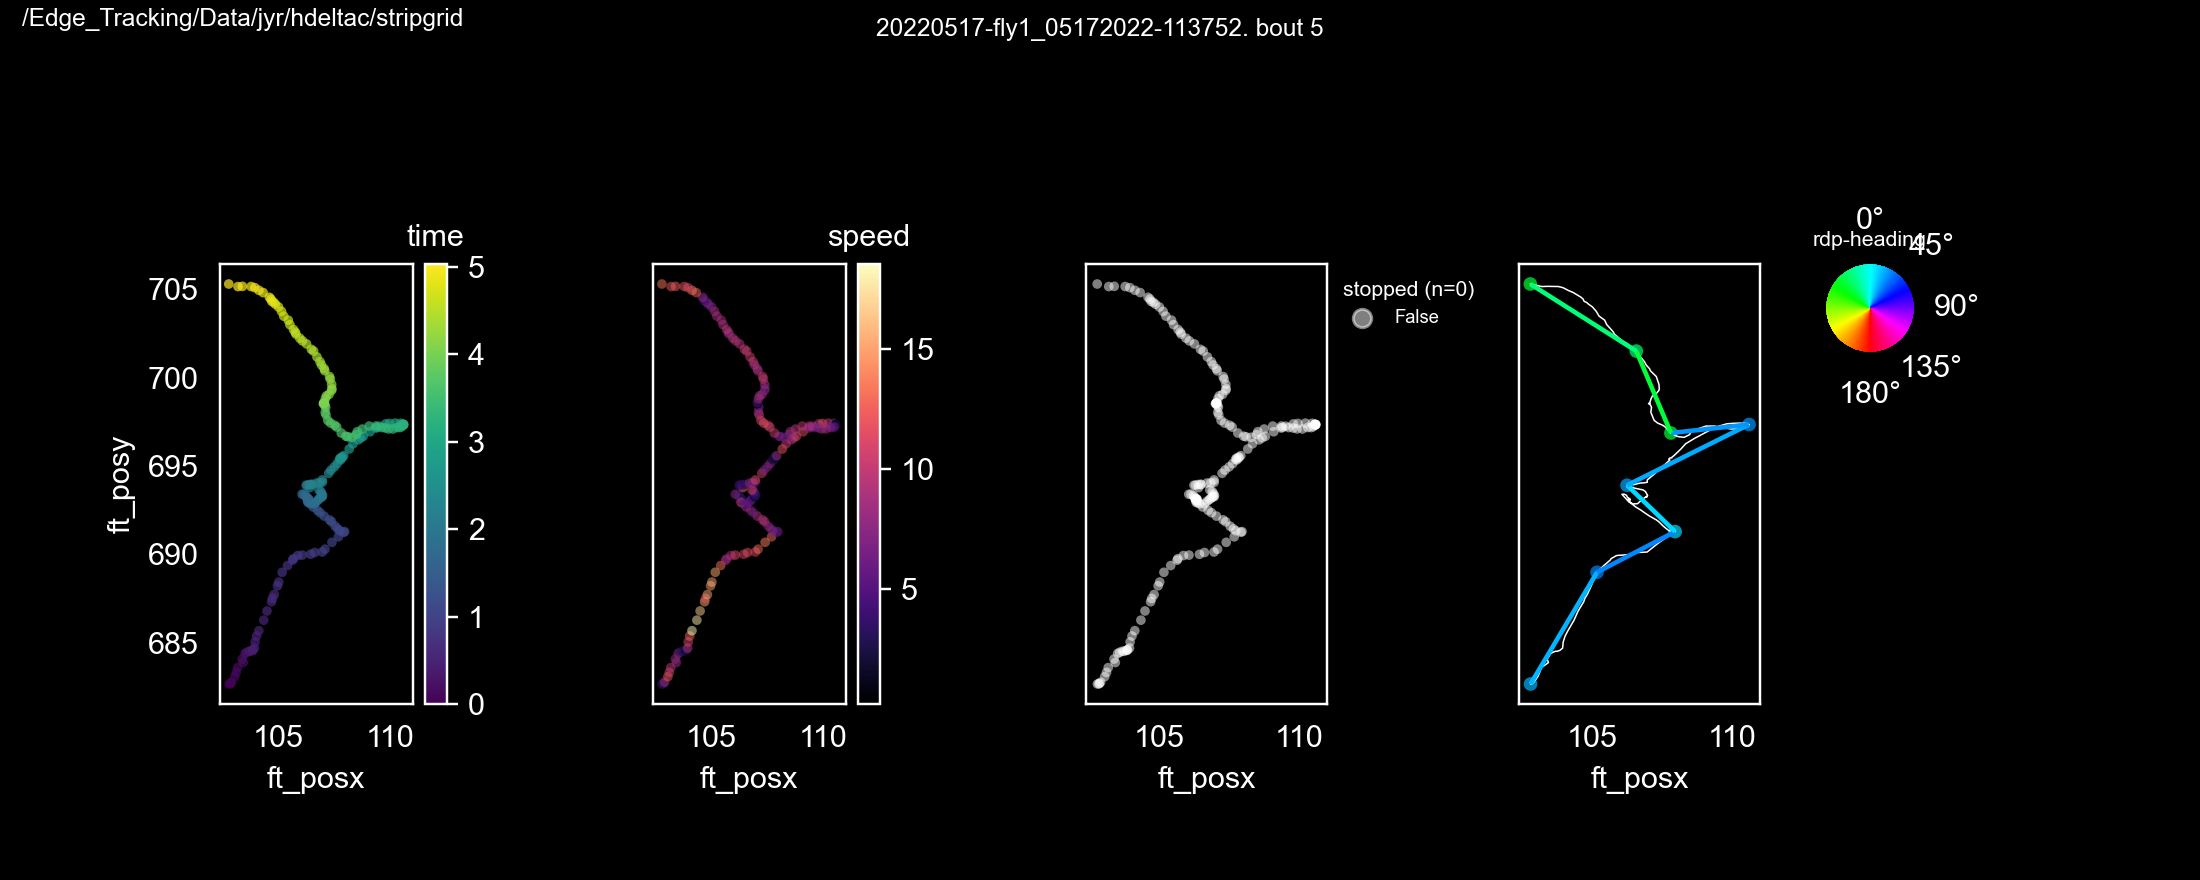

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 heading-at-stops_20220517-fly1_05172022-113752_bout5


<IPython.core.display.Javascript object>


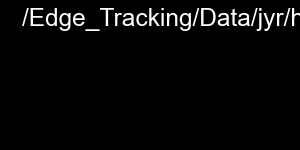

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 heading-at-stops_20220517-fly1_05172022-113752_bout6


<IPython.core.display.Javascript object>


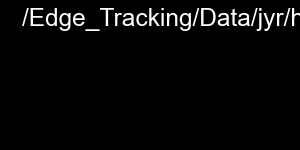

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 heading-at-stops_20220517-fly1_05172022-113752_bout7


<IPython.core.display.Javascript object>


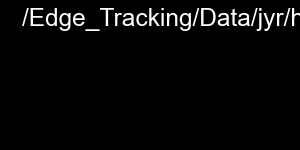

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 heading-at-stops_20220517-fly1_05172022-113752_bout8


<IPython.core.display.Javascript object>


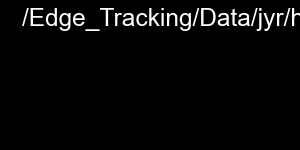

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 heading-at-stops_20220517-fly1_05172022-113752_bout9


<IPython.core.display.Javascript object>


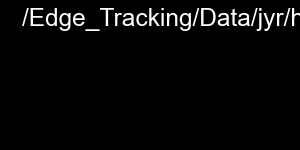

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 heading-at-stops_20220517-fly1_05172022-113752_bout12


<IPython.core.display.Javascript object>


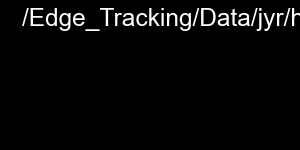

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 heading-at-stops_20220517-fly1_05172022-113752_bout15


<IPython.core.display.Javascript object>


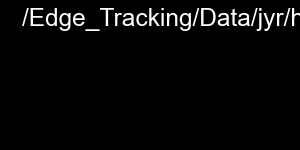

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 heading-at-stops_20220517-fly1_05172022-113752_bout16


<IPython.core.display.Javascript object>


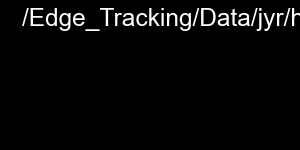

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 heading-at-stops_20220517-fly1_05172022-113752_bout17


<IPython.core.display.Javascript object>


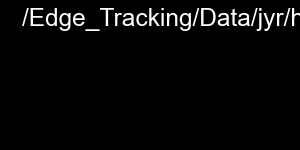

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 heading-at-stops_20220517-fly1_05172022-113752_bout19


/Users/julianarhee/Repositories/plume-tracking/behavior.py:1999: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axn = pl.subplots(1, 4, figsize=(10, 4), sharex=True, sharey=True)


<IPython.core.display.Javascript object>


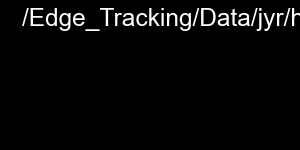

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 heading-at-stops_20220517-fly1_05172022-113752_bout26


<IPython.core.display.Javascript object>


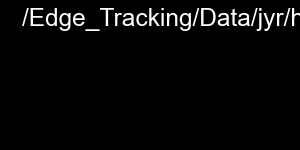

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 heading-at-stops_20220517-fly1_05172022-113752_bout27


<IPython.core.display.Javascript object>


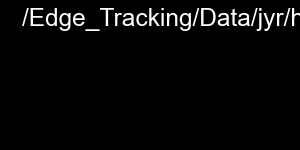

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 heading-at-stops_20220517-fly1_05172022-113752_bout28


<IPython.core.display.Javascript object>


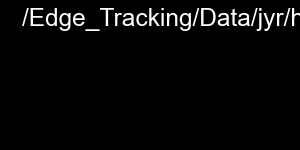

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 heading-at-stops_20220517-fly1_05172022-113752_bout32


<IPython.core.display.Javascript object>


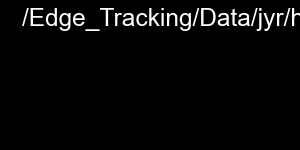

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 heading-at-stops_20220517-fly1_05172022-113752_bout37


<IPython.core.display.Javascript object>


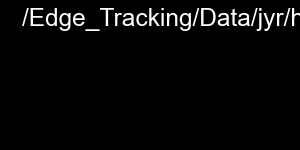

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 heading-at-stops_20220517-fly1_05172022-113752_bout40


In [51]:
stopdur_thresh = 0.5
speed_thresh = 1.0
df_ = butil.get_speed_and_stops(df_, speed_thresh=speed_thresh, stopdur_thresh=stopdur_thresh)
for bnum in plot_bouts:
    b_ = df_[df_['boutnum']==bnum].copy()

    fig = butil.examine_heading_at_stops(b_, xvar=xvar, yvar=yvar, theta_range=theta_range)
    # -----
    pl.subplots_adjust(right=0.8, top=0.7, wspace=0.8, bottom=0.2, left=0.1)
    fig.suptitle('{}. bout {}'.format(trial_id, bnum), fontsize=8)
    util.label_figure(fig, fig_id)

    figname = 'heading-at-stops_{}_bout{}'.format(trial_id, bnum)
    pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)))
    print(curr_savedir, figname)

# distn of angles

In [70]:
importlib.reload(butil)
importlib.reload(util)

<module 'utils' from '/Users/julianarhee/Repositories/plume-tracking/utils.py'>

In [71]:
fly_id = '20220517-fly1'

In [72]:
df_ = df_fp[df_fp['fly_id']==fly_id].copy()
trial_id = df_['trial_id'].unique()[0]

In [73]:
# TODO filter by croswind dist
rdp_dist_thresh = 3
# incl_bouts = rdp_dists[rdp_dists['crosswind_dist']>rdp_dist_thresh]['boutnum']
print(theta_range)

(-3.141592653589793, 3.141592653589793)


In [74]:
speed_thresh=1.0
stopdur_thresh=0.5
df_ = butil.add_rdp_by_bout(df_, epsilon=rdp_epsilon, xvar=xvar, yvar=yvar)
df_ = butil.rdp_to_heading(df_, xvar=xvar, yvar=yvar, theta_range=theta_range)
df_ = butil.get_speed_and_stops(df_, speed_thresh=speed_thresh, stopdur_thresh=stopdur_thresh)

Changing 1


In [75]:
bnum = 15
b_ = df_[df_['boutnum']==bnum].copy()
stopbouts = b_[b_['stopped']]['stopboutnum'].unique()
stopbouts

array([24, 26, 28, 30, 32, 34, 36])

<IPython.core.display.Javascript object>


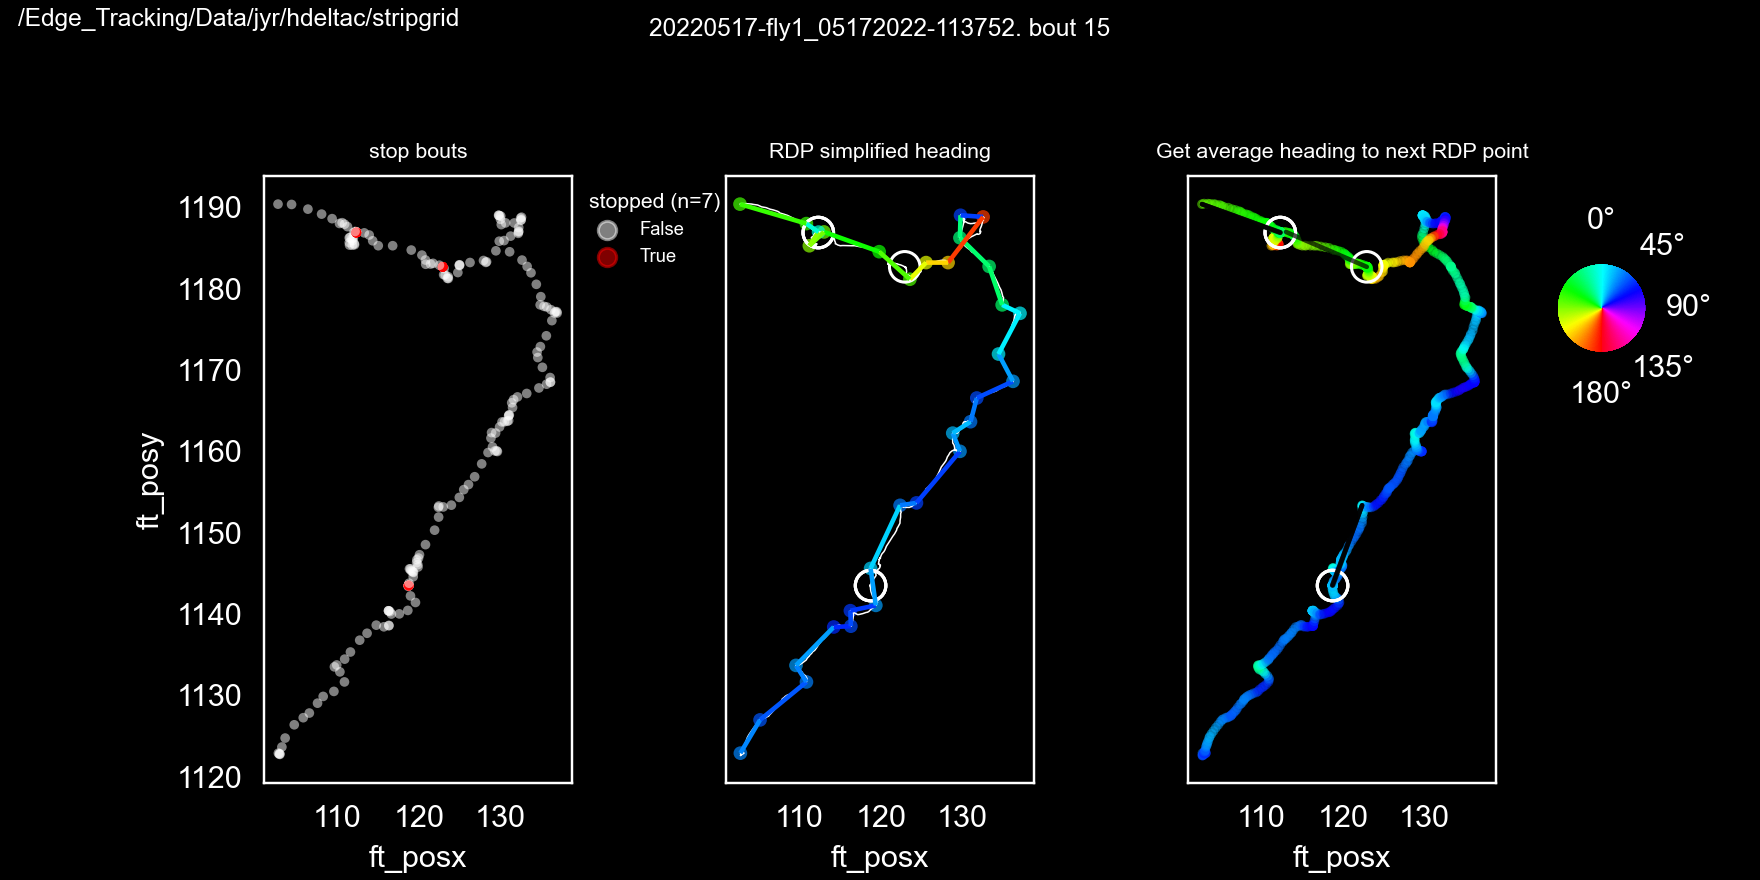

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 meandir-at-stop_20220517-fly1_05172022-113752_bout15


In [77]:
theta_norm = mpl.colors.Normalize(theta_range[0], theta_range[1])
theta_cmap='hsv'
fig = butil.visualize_calculation_heading_after_stop(b_)
fig.suptitle('{}. bout {}'.format(trial_id, bnum), fontsize=8)
util.label_figure(fig, '{}'.format(fig_id))

figname = 'meandir-at-stop_{}_bout{}'.format(trial_id, bnum)
pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)))
print(curr_savedir, figname)

In [78]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [79]:
meandirs = butil.mean_dir_after_stop(df_, theta_range=theta_range) #speed_thresh=1.0, stopdur_thresh=0.5)

<IPython.core.display.Javascript object>


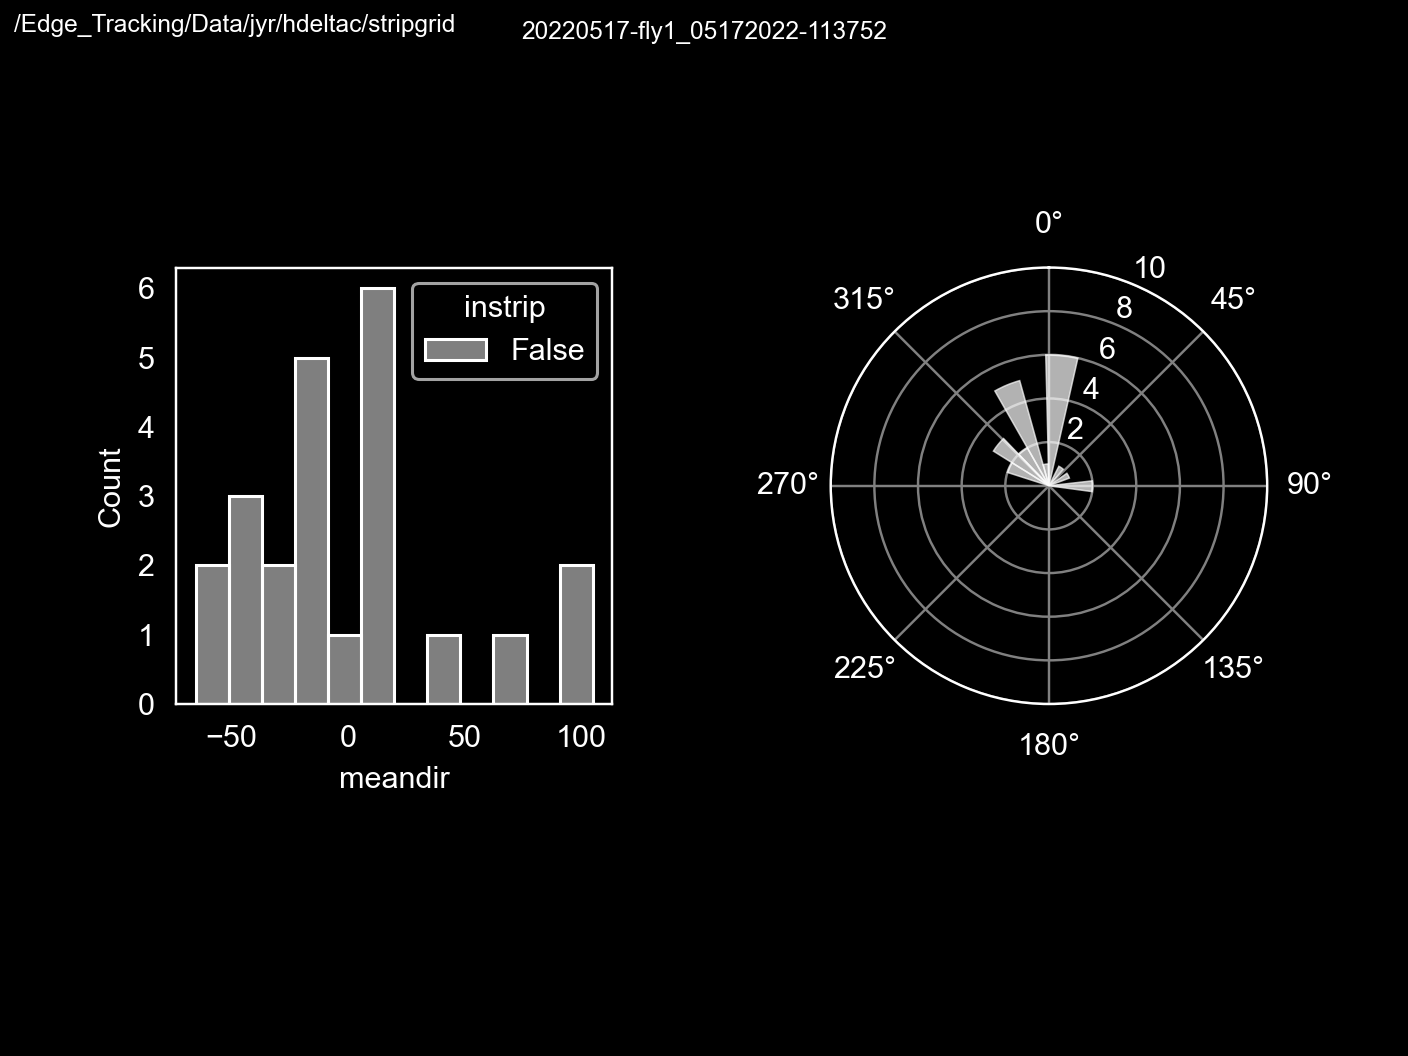

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid/20220517-fly1 hist-heading-at-stops_20220517-fly1_05172022-113752


In [80]:
#fig, ax = pl.subplots(subplot_kw={'projection': 'polar'})
fig = pl.figure()
ax = fig.add_subplot(121) #pl.subplots()
sns.histplot(data=meandirs, x='meandir', ax=ax, bins=12, hue='instrip', 
             fill=True, palette=palette)

ax.set_box_aspect(1)
ax=fig.add_subplot(122, projection='polar') #[0.8]*3, facecolor='r')
util.circular_hist(ax, np.deg2rad(meandirs[~meandirs['instrip']]['meandir']), bins=12, #len(meandirs), 
                  facecolor='w', density=False)
util.circular_hist(ax, np.deg2rad(meandirs[meandirs['instrip']]['meandir']), bins=12, 
                  facecolor='r', density=False)
ax.set_ylim([0, 10])

pl.subplots_adjust(wspace=0.5, bottom=0.2) #, left=0.1)
fig.suptitle('{}'.format(trial_id), fontsize=8)
util.label_figure(fig, fig_id)

figname = 'hist-heading-at-stops_{}'.format(trial_id)
pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)))
print(curr_savedir, figname)

# all flies

In [81]:
curr_savedir = os.path.split(curr_savedir)[0]
print(curr_savedir)

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid


In [82]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [83]:
theta_range

(-3.141592653589793, 3.141592653589793)

In [84]:
smooth = False
xvar='smoothed_ft_posx' if smooth else 'ft_posx'
yvar='smoothed_ft_posy' if smooth else 'ft_posy'
smooth_window=11
rdp_epsilon=1 #0.5 # distance unit (usually, 1mm)
speed_thresh=1.0
stopdur_thresh=0.25
heading_var = 'rdp_arctan2' #'ft_heading'
theta_range = (-np.pi, np.pi)
# ----------------------------------------------------
d_list=[]
m_list=[]
for trial_id, df_ in df_fp.groupby('trial_id'):
    trial_id = df_['trial_id'].unique()[0]
    oparams = butil.get_odor_params(df_) #[df1['condition']==cond])
    df_ = df_[df_['time']>=oparams['odor_start_time']].copy()
    # process df
    df_ = butil.smooth_traces(df_, window_size=smooth_window, return_same=True)
    # simplify path with RDP
    df_ = butil.add_rdp_by_bout(df_, epsilon=rdp_epsilon, xvar=xvar, yvar=yvar)
    df_ = butil.rdp_to_heading(df_, xvar=xvar, yvar=yvar, theta_range=theta_range)
    # get mean dur after stops
    df_ = butil.get_speed_and_stops(df_, speed_thresh=speed_thresh, stopdur_thresh=stopdur_thresh)
    meandirs = butil.mean_dir_after_stop(df_, theta_range=theta_range)
    m_list.append(meandirs)
    d_list.append(df_)
mdf = pd.concat(m_list).reset_index(drop=True)
df_proc = pd.concat(d_list).reset_index(drop=True)

Changing 1


##### for each bout, grab the last stop bout (if exists)

In [85]:
mdf['is_last'] = False
d_list = []
for (trial_id, bnum), df_ in mdf.groupby(['trial_id', 'boutnum']):
    last_ = df_.sort_values(by=['stopboutnum'],ascending=True).iloc[-2:]
    d_list.append(last_) #df_.iloc[last_ix])
    mdf.loc[last_.index, 'is_last'] = True
last_stops = pd.concat(d_list, axis=0)
for v in ['crosswind_dist', 'meandir']:
    last_stops[v] = last_stops[v].astype(float)
last_stops.head()

fly_id                       trial_id  \
0  20220517-fly1  20220517-fly1_05172022-113752   
1  20220517-fly1  20220517-fly1_05172022-113752   
2  20220517-fly1  20220517-fly1_05172022-113752   
3  20220517-fly1  20220517-fly1_05172022-113752   
4  20220517-fly1  20220517-fly1_05172022-113752   

                               condition  boutnum  crosswind_dist  \
0  hdc_split_60d05_sytjgcamp7f_stripgrid        3       15.170034   
1  hdc_split_60d05_sytjgcamp7f_stripgrid        3       15.170034   
2  hdc_split_60d05_sytjgcamp7f_stripgrid        7       20.543125   
3  hdc_split_60d05_sytjgcamp7f_stripgrid        8       65.301428   
4  hdc_split_60d05_sytjgcamp7f_stripgrid        8       65.301428   

   stopboutnum  instrip    meandir  is_last  
0            2    False -23.867598    False  
1            4    False -25.696302    False  
2            6    False   6.298658    False  
3            8     True  -7.342705    False  
4           10     True  14.609617    False

In [86]:
last_

fly_id                       trial_id  \
1392  20220629-fly3  20220629-fly3_06292022-164712   
1393  20220629-fly3  20220629-fly3_06292022-164712   

                                  condition  boutnum  crosswind_dist  \
1392  hdc_split_60d05_sytjgcamp7f_stripgrid       17      832.007519   
1393  hdc_split_60d05_sytjgcamp7f_stripgrid       17      832.007519   

      stopboutnum  instrip    meandir  is_last  
1392          724    False  33.589146    False  
1393          726    False  37.320309    False

<IPython.core.display.Javascript object>


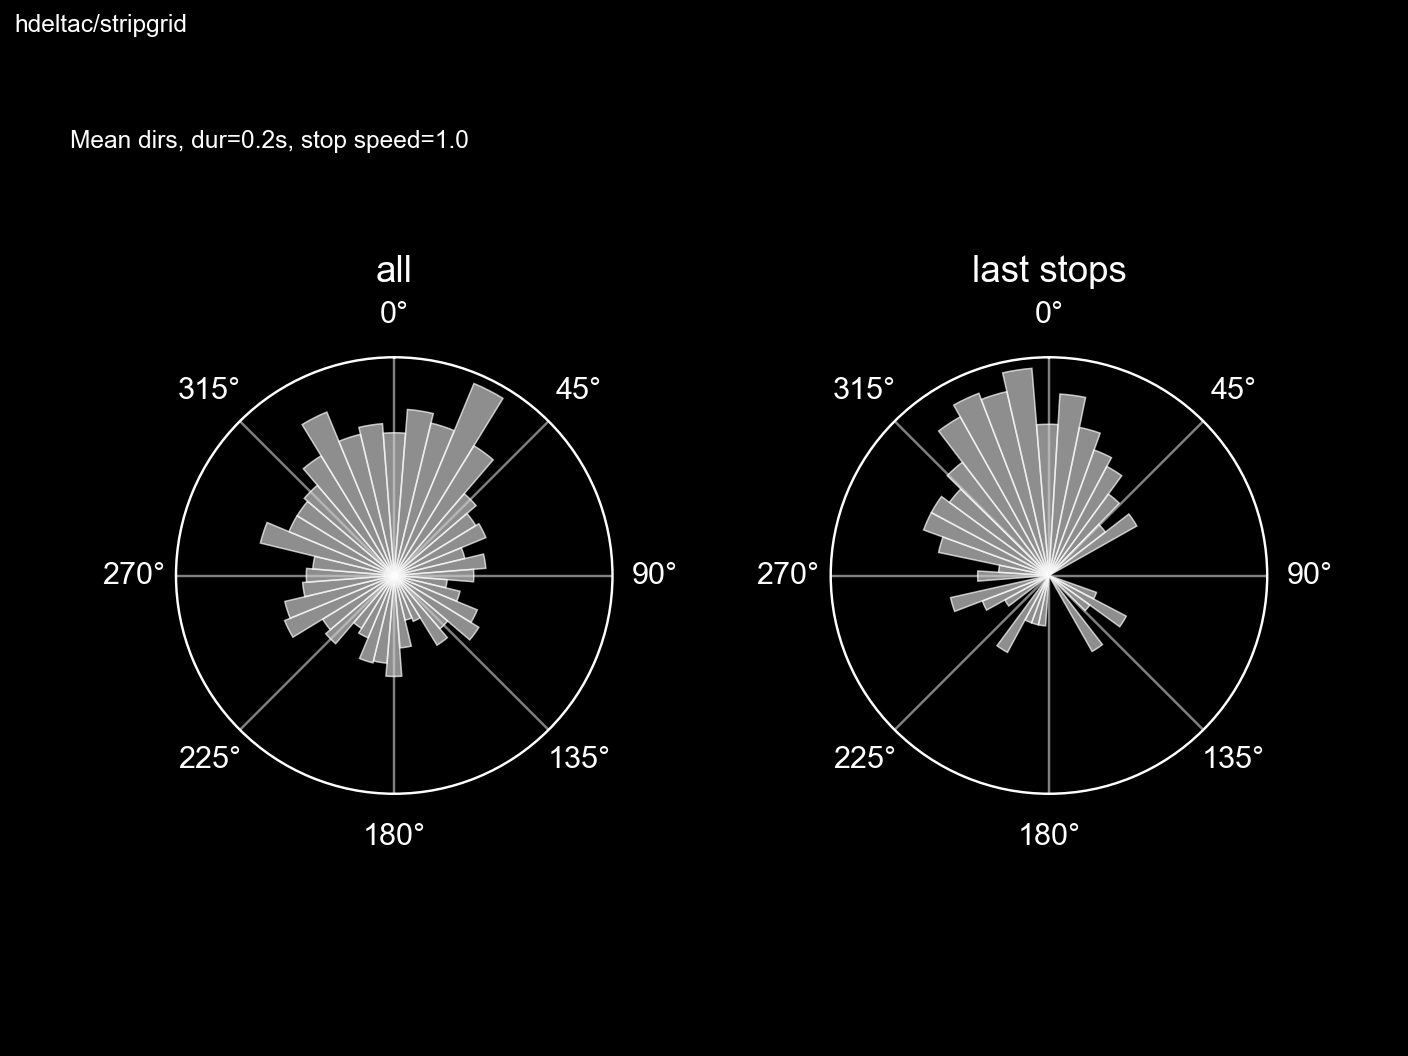

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid meandir_after_stop_outbouts_all-flies_polar


In [87]:
# Construct figure and axis to plot on
min_xwind_dist=3.0
fig, axn = pl.subplots(1, 2, subplot_kw=dict(projection='polar'))
# Visualise by area of bins
ax =axn[0]
util.circular_hist(ax, np.deg2rad(mdf['meandir']), bins=40, 
                  facecolor=[0.8]*3)
pl.subplots_adjust(wspace=0.5, top=0.8)
ax.set_title('all')
ax =axn[1]
util.circular_hist(ax, np.deg2rad(last_stops['meandir']), bins=40, 
                  facecolor=[0.8]*3)
pl.subplots_adjust(wspace=0.5, top=0.8)
ax.set_title('last stops')
# -------
title = 'Mean dirs, dur={:.1f}s, stop speed={:.1f}'\
            .format(stopdur_thresh, speed_thresh)
fig.text(0.05, 0.86, title, fontsize=8)
util.label_figure(fig, '{}'.format(experiment))

figname = 'meandir_after_stop_outbouts_all-flies_polar'
pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)))
print(curr_savedir, figname)

In [88]:
mdf['fly_id'].unique()

array(['20220517-fly1', '20220627-fly1', '20220627-fly2', '20220628-fly1',
       '20220629-fly1', '20220629-fly3'], dtype=object)

In [89]:
importlib.reload(util)

<module 'utils' from '/Users/julianarhee/Repositories/plume-tracking/utils.py'>

<IPython.core.display.Javascript object>


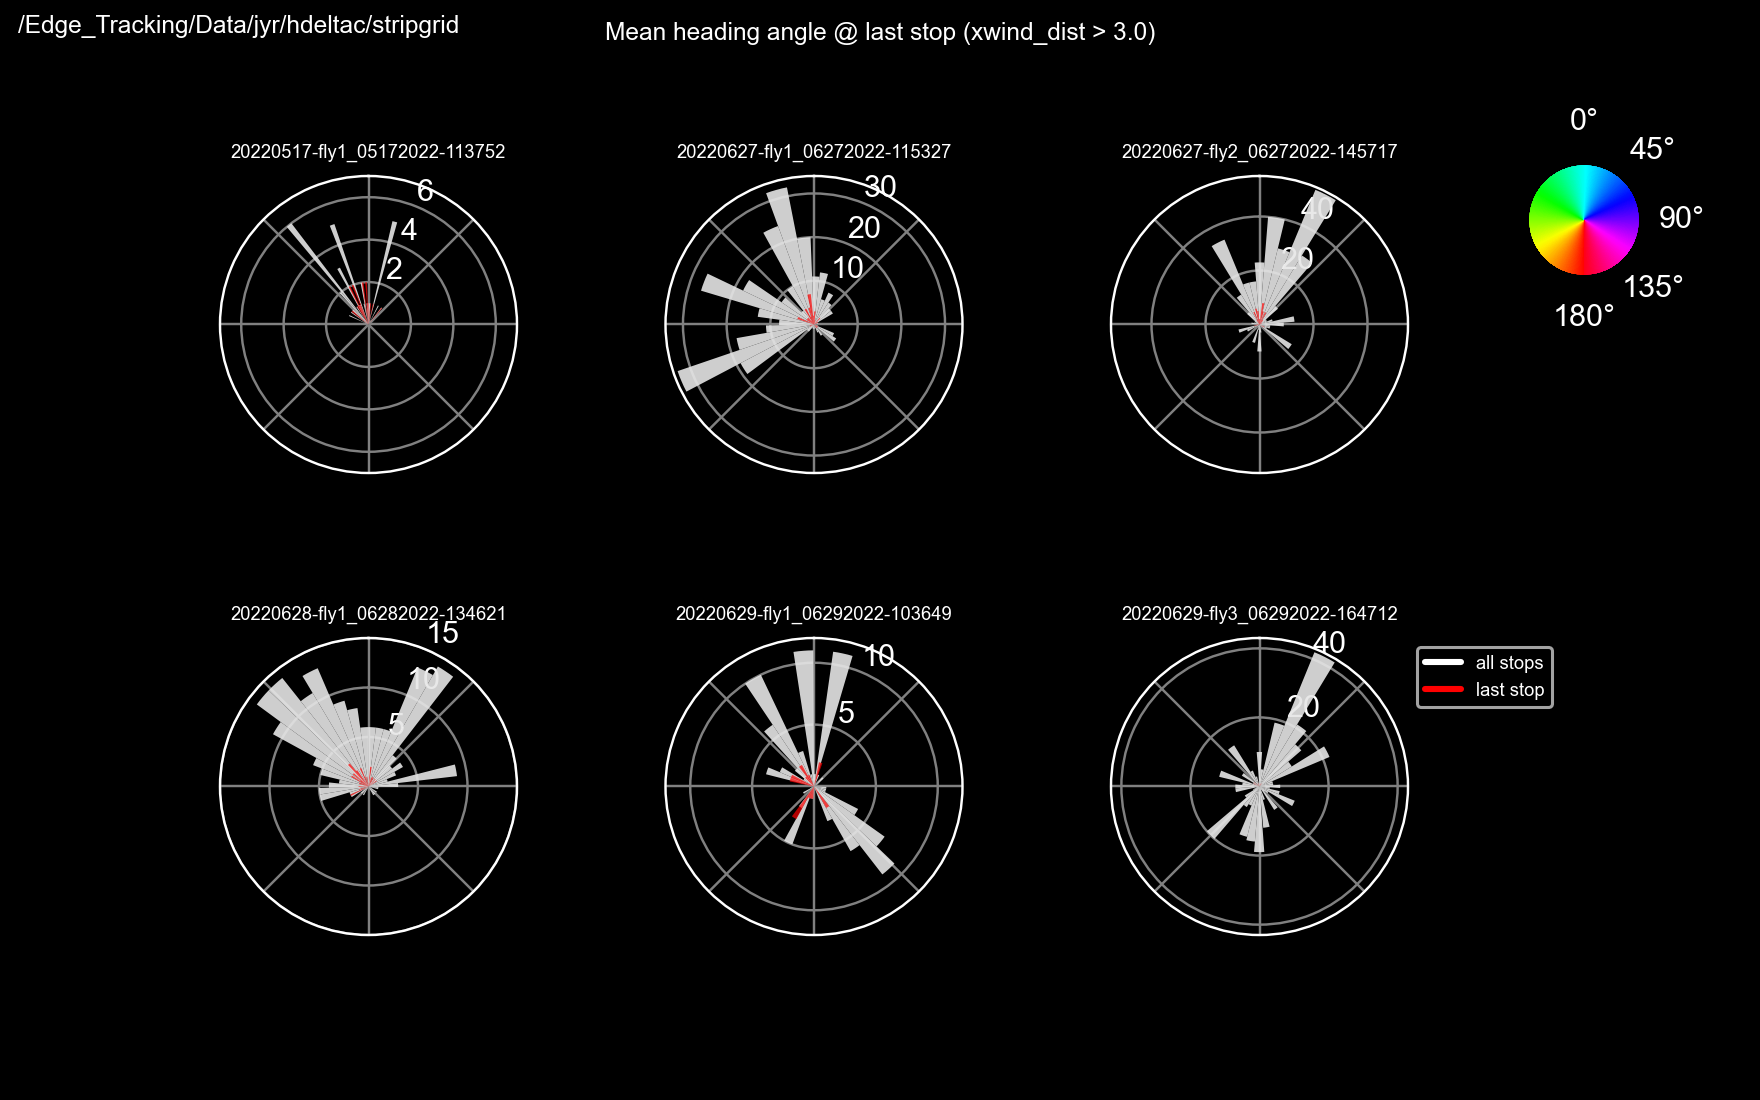

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid hist-heading-at-stops_each-fly_polar


In [90]:
nr=2
nc=3
show_xticks=False
fig, axn = pl.subplots(nr, nc, subplot_kw=dict(projection='polar'), 
                       sharex=True, sharey=False, figsize=(8, 5))
# Visualise by area of bins
for ax, (trial_id, df_) in zip(axn.flat, mdf.groupby('trial_id')):
    
    plotdf = df_[df_['crosswind_dist']>=min_xwind_dist]
    last_ = last_stops[(last_stops['trial_id']==trial_id)
                      & (last_stops['crosswind_dist']>=min_xwind_dist)]
    
    n1, _, _ = util.circular_hist(ax, np.deg2rad(plotdf['meandir']), bins=40, 
                  facecolor=[0.9]*3, density=False, edgecolor='none', alpha=0.9)
    n2, _, _ = util.circular_hist(ax, np.deg2rad(last_['meandir']), bins=40, 
                  facecolor='r', density=False, alpha=.7, edgecolor='none')
    # set ax ticks
    ylim = max([n1.max(), n2.max()])
    ax.set_ylim([0, ylim+1])
    if show_xticks:
        xT=ax.get_xticks() #0]
        xL=['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',\
        r'$\pi$',r'$\frac{5\pi}{4}$',r'$\frac{3\pi}{2}$',r'$\frac{7\pi}{4}$']
        xL2 = [v if i%2==0 else '' for i, v in enumerate(xL)]
        ax.set_xticks(xT, labels=xL2)
    else:
        ax.set_xticklabels([])
    ax.set_title(trial_id, fontsize=6)
pl.subplots_adjust(wspace=0.5, hspace=0.2, right=0.8)
# legends
axes=[0.85, 0.75, 0.1, 0.1]
util.add_colorwheel(fig, cmap=theta_cmap, theta_range=theta_range, axes=axes)
legh = [mpl.lines.Line2D([0], [0], color=c, lw=2) for c in ['w', 'r'] ]
ax.legend(handles=legh, labels=['all stops', 'last stop'],
          bbox_to_anchor=(1,1), loc='upper left', fontsize=6)

fig.suptitle('Mean heading angle @ last stop (xwind_dist > {})'.format(min_xwind_dist), fontsize=8)
util.label_figure(fig, fig_id)

figname = 'hist-heading-at-stops_each-fly_polar'
pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)))
print(curr_savedir, figname)

<IPython.core.display.Javascript object>


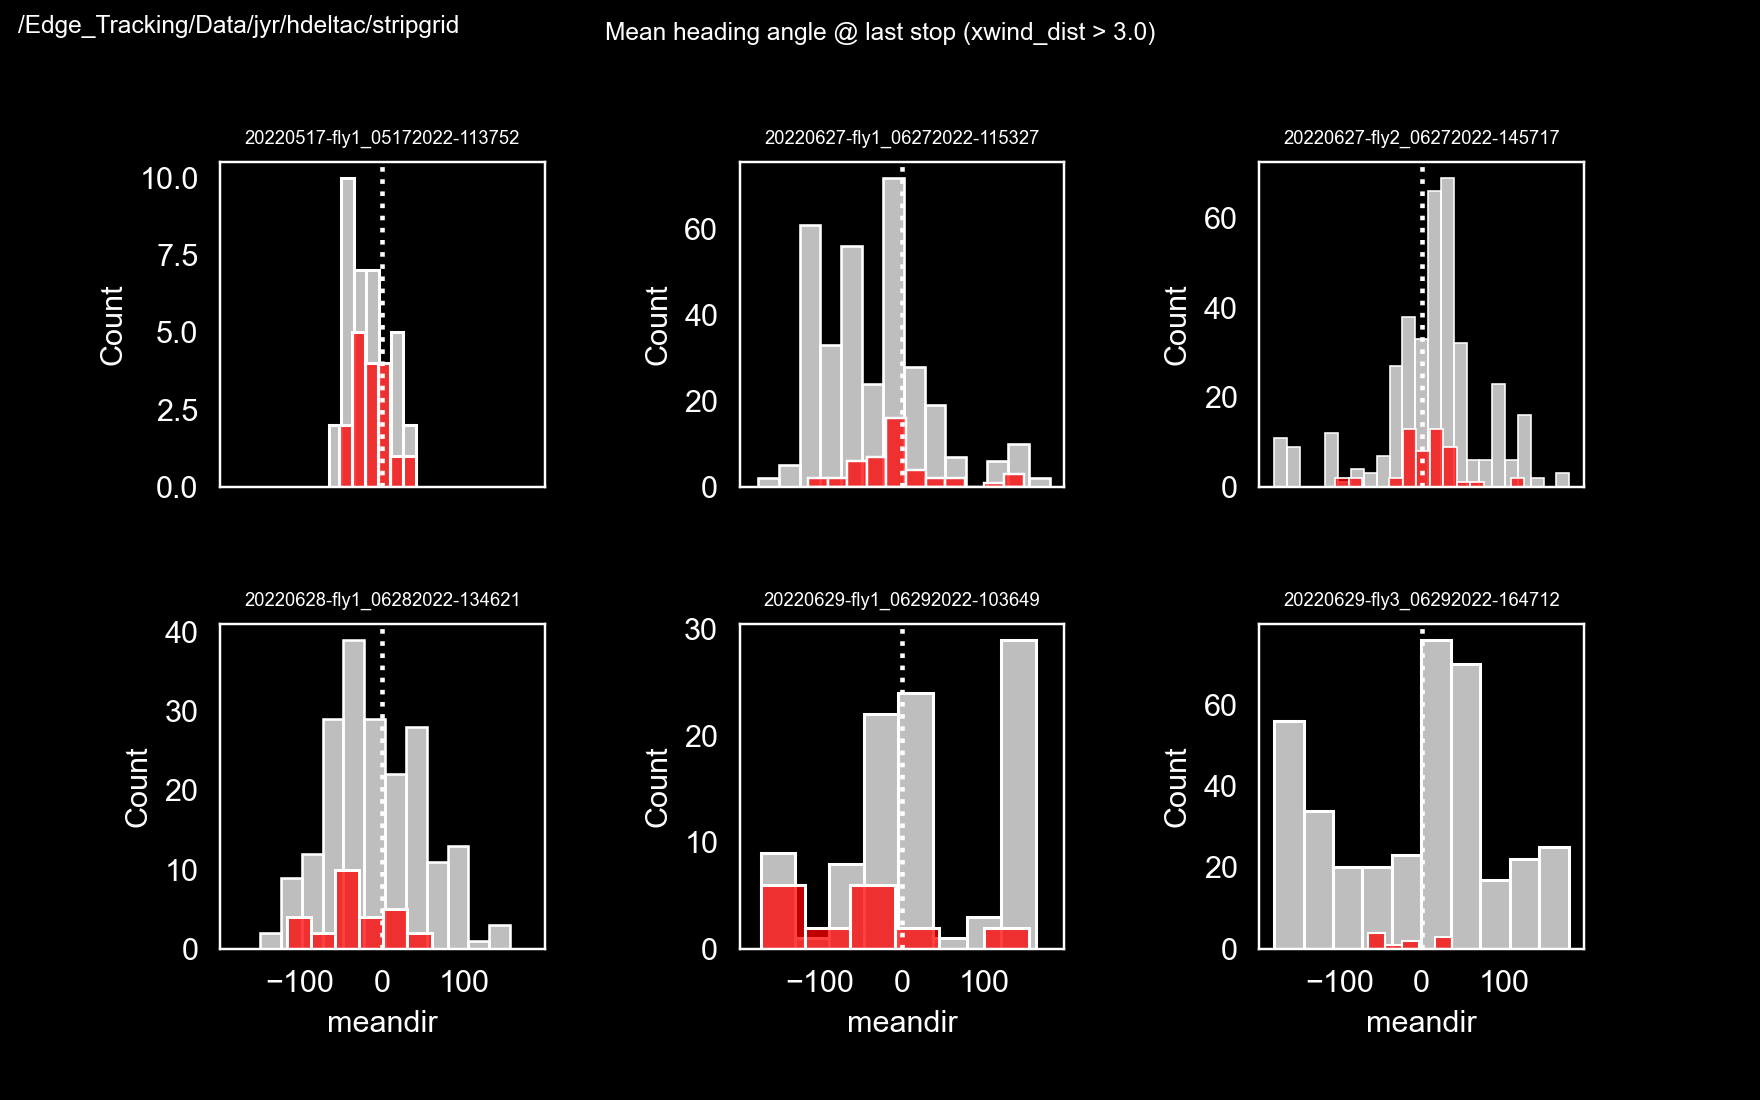

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/stripgrid hist-heading-at-stops_each-fly


In [91]:
nr=2
nc=3
show_xticks=False
fig, axn = pl.subplots(nr, nc, #subplot_kw=dict(projection='polar'), 
                       sharex=True, sharey=False, figsize=(8, 5))
# Visualise by area of bins
for ax, (trial_id, df_) in zip(axn.flat, mdf.groupby('trial_id')):
    
    all_ = df_[df_['crosswind_dist']>=min_xwind_dist]
    last_ = last_stops[(last_stops['trial_id']==trial_id)
                      & (last_stops['crosswind_dist']>=min_xwind_dist)]
    
    sns.histplot(data=all_, x='meandir', ax=ax, #bins=12, #hue='instrip', 
             fill=True, color='w')
    sns.histplot(data=last_, x='meandir', ax=ax, #bins=12, #hue='instrip', 
             fill=True, color='r')
    ax.axvline(x=0, c='w', linestyle=':')
    ax.set_box_aspect(1)
    ax.set_title(trial_id, fontsize=6)
pl.subplots_adjust(wspace=0.6)

fig.suptitle('Mean heading angle @ last stop (xwind_dist > {})'.format(min_xwind_dist), fontsize=8)
util.label_figure(fig, fig_id)

figname = 'hist-heading-at-stops_each-fly'
pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)))
print(curr_savedir, figname)

##### look at 1 fly again

In [92]:
fly_ids = sorted(mdf['fly_id'].unique(), key=util.natsort)
for fi, fly_id in enumerate(fly_ids):
    print(fi, fly_id)

0 20220517-fly1
1 20220627-fly1
2 20220627-fly2
3 20220628-fly1
4 20220629-fly1
5 20220629-fly3


In [93]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [96]:
fly_id = fly_ids[0]

meanangs_ = mdf[(mdf['fly_id']==fly_id) & (mdf['crosswind_dist']>=min_xwind_dist)].copy()
last_ = last_stops[(last_stops['fly_id']==fly_id) 
                   & (last_stops['crosswind_dist']>=min_xwind_dist)].copy()
df_= df_proc[df_proc['fly_id']==fly_id].copy()
trial_id = df_['trial_id'].unique()[0]

df_['is_last'] = False
for bnum, b_ in meanangs_.groupby('boutnum'):
    last_stopboutnums = b_[b_['is_last']]['stopboutnum'].unique()
    df_.loc[(df_['stopboutnum'].isin(last_stopboutnums))
            & (df_['boutnum']==bnum), 'is_last'] = True
    
xlims = {'20220517-fly1': [80, 140],
        '20220627-fly2': [-45, 0]}

<IPython.core.display.Javascript object>


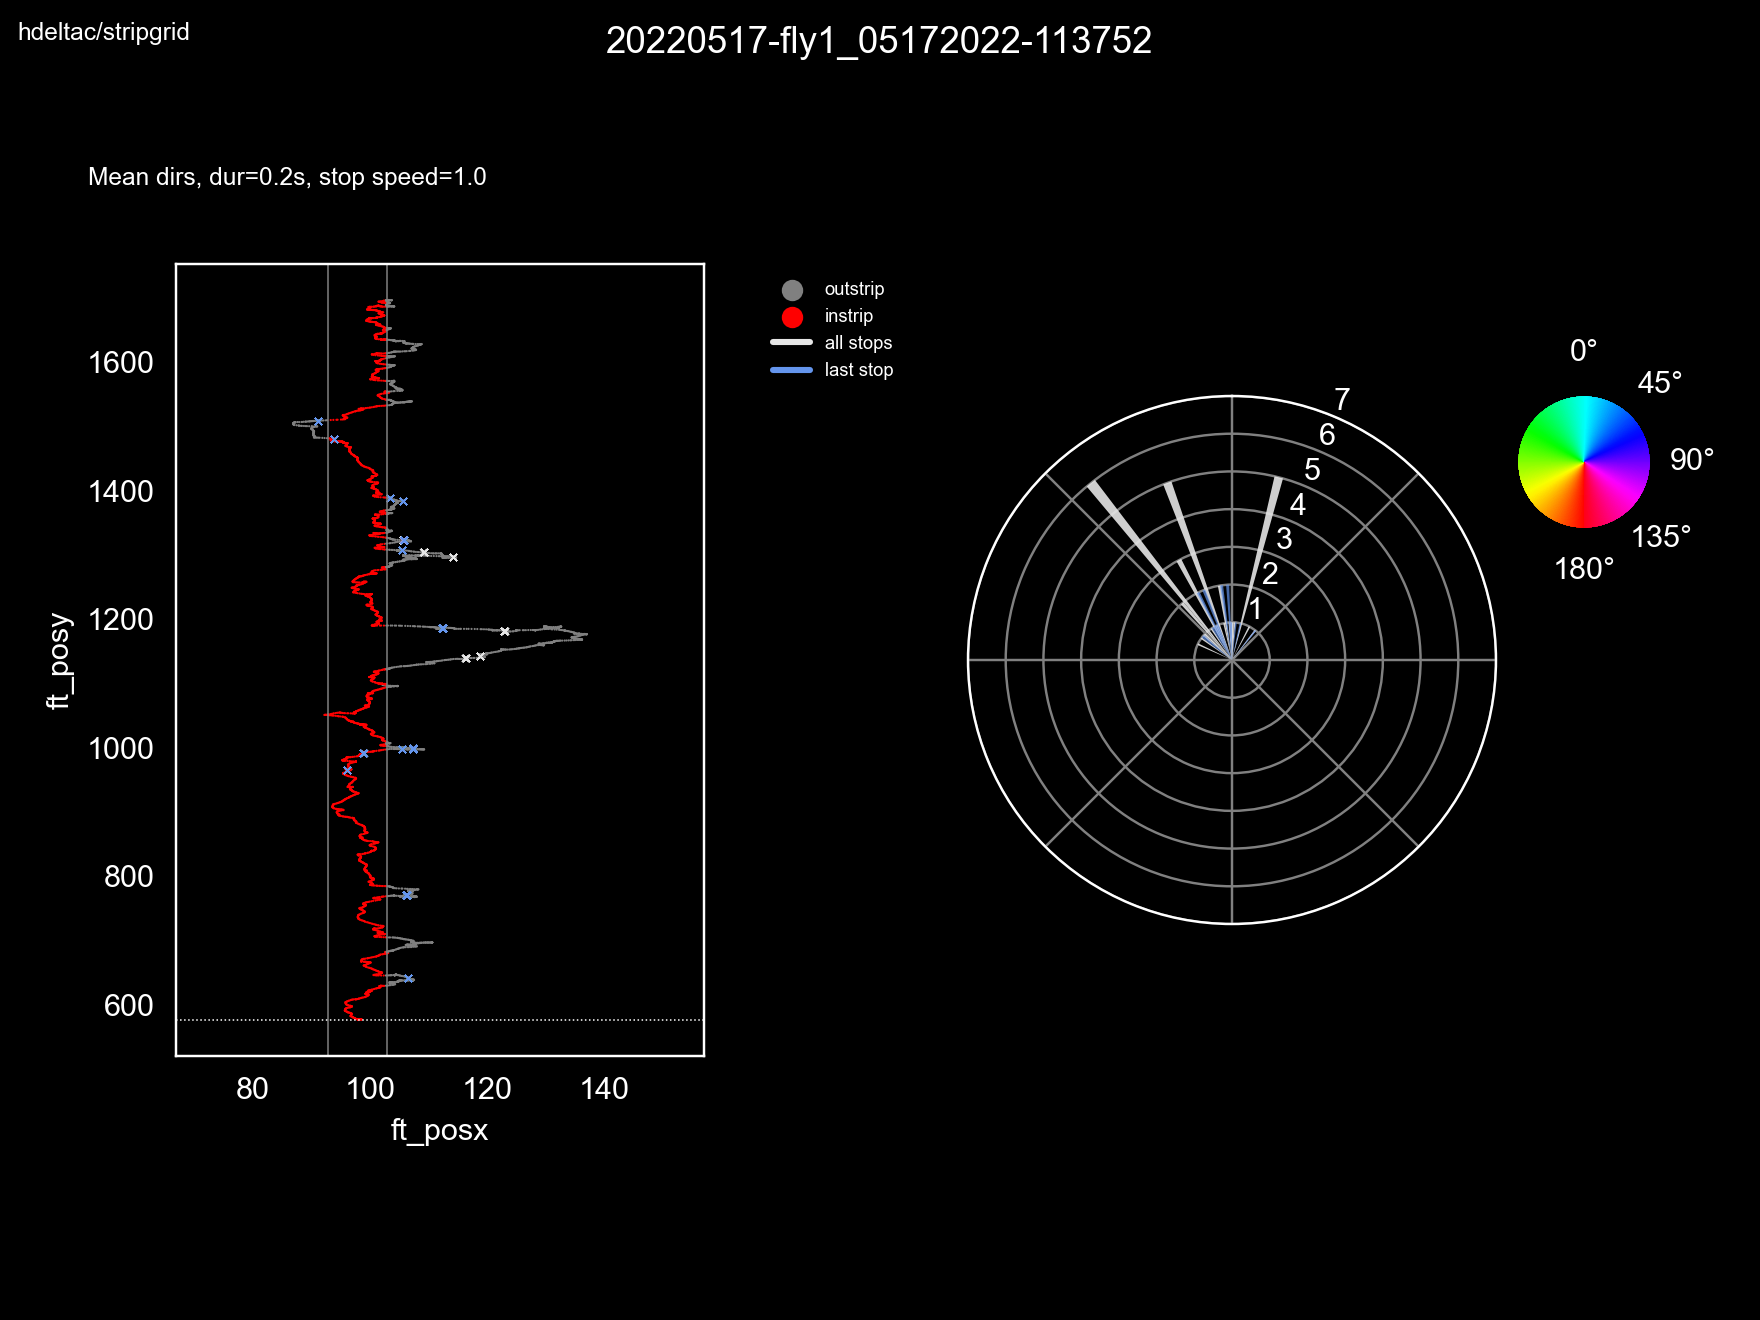

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


summary_heading-at-stop_20220517-fly1_05172022-113752


In [97]:

#fly_id = '20220517-fly1'
instrip_palette={True: 'r', False: 'gray'}
laststop_color='cornflowerblue'
stop_color = [0.9]*3
fig = butil.summarize_stops_and_turns(df_, meanangs_, last_,
                    theta_range=(-np.pi, np.pi),theta_cmap='hsv',
                    laststop_color=laststop_color, stop_color=stop_color,
                    instrip_palette=instrip_palette, xlims=None, 
                    stop_marker='x', stop_markersize=5, lw=0.5)
title = 'Mean dirs, dur={:.1f}s, stop speed={:.1f}'\
            .format(stopdur_thresh, speed_thresh)
fig.text(0.05, 0.86, title, fontsize=8)
util.label_figure(fig, '{}'.format(experiment))
fig.suptitle(trial_id)

figname = 'summary_heading-at-stop_{}'.format(trial_id)
pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)))
print(figname)